In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np

In [2]:
def plot_body_data(body_name, type_data_dict, type_colors, save_path):
    """Creates a plot for each body_name with two subplots: xy path and theta angle."""
    sns.set(style="whitegrid")
    
    # Prepare the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
    
    # Plot xy paths
    for type_of_input, data_dict in type_data_dict.items():
        color = type_colors[type_of_input]
        for input_value, df in data_dict.items():
            ax1.plot(df['x'], df['y'], label=f'{type_of_input} {input_value}', color=color, alpha=0.7)
    ax1.set_xlabel('x', fontsize=14)
    ax1.set_ylabel('y', fontsize=14)
    ax1.set_title(f'{body_name}: XY Path', fontsize=16)
    ax1.legend(title='Input Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True)
    
    # Plot theta angles
    for type_of_input, data_dict in type_data_dict.items():
        color = type_colors[type_of_input]
        for input_value, df in data_dict.items():
            ax2.plot(df.index, df['theta'], label=f'{type_of_input} {input_value}', color=color, alpha=0.7)
    ax2.set_xlabel('Index', fontsize=14)
    ax2.set_ylabel('Theta', fontsize=14)
    ax2.set_title(f'{body_name}: Theta Angles', fontsize=16)
    ax2.legend(title='Input Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True)

    plt.tight_layout()
    # plt.savefig(os.path.join(save_path, f'{body_name}_plot.png'))
    plt.show()

def main(directory_path, save_path):
    """Main function to process all files and plot data for each body_name."""
    # Dictionary to hold dataframes for each body_name and type_of_input
    body_data = {}
    
    # Define a fixed color palette for type_of_input
    type_palette = sns.color_palette("colorblind", n_colors=3)  # Adjust n_colors to the number of unique type_of_input
    type_colors = {}
    
    # Identify unique type_of_input to assign colors
    for file in os.listdir(directory_path):
        if file.endswith(".csv"):
            parts = file.split('_')
            type_of_input = parts[1]
            if type_of_input not in type_colors:
                type_colors[type_of_input] = type_palette.pop()
    
    # Process each file in the directory
    for file in os.listdir(directory_path):
        if file.endswith(".csv"):
            # Extract body_name, type_of_input, and input_value from the filename
            parts = file.split('_')
            body_name = parts[0]
            type_of_input = parts[1]
            input_value = parts[2].replace('.csv', '')
            
            # Load the CSV file into a DataFrame
            df = pd.read_csv(os.path.join(directory_path, file))
            
            # Initialize the dictionary for the body_name if not already done
            if body_name not in body_data:
                body_data[body_name] = {}
                
            # Initialize the dictionary for the type_of_input if not already done
            if type_of_input not in body_data[body_name]:
                body_data[body_name][type_of_input] = {}
                
            # Store the dataframe in the dictionary
            body_data[body_name][type_of_input][input_value] = df
    
    # Create plots for each body_name
    for body_name, type_data_dict in body_data.items():
        plot_body_data(body_name, type_data_dict, type_colors, save_path)

In [3]:
# Example usage:
base_directory = '10_analysis/specific_force'  # Replace with the path to your base directory
save_path = 'plots_10_with_ten_repetitions'     # Replace with the path where you want to save the plots

main(base_directory, save_path)

In [4]:
def plot_body_data(body_name, experiment_data_dict, type_colors):
    """Creates a plot for each body_name with six subplots (two subplots per experiment type)."""
    sns.set(style="whitegrid")
    
    # Determine the global min and max y-values across all data points for normalization
    global_min_y = float('inf')
    global_max_y = float('-inf')
    
    for experiment_type, type_data_dict in experiment_data_dict.items():
        for type_of_input, data_dict in type_data_dict.items():
            for input_value, df in data_dict.items():
                if 'y' in df.columns:
                    min_y = df['y'].min()
                    max_y = df['y'].max()
                    global_min_y = min(global_min_y, min_y)
                    global_max_y = max(global_max_y, max_y)
    
    # Prepare the figure with six subplots
    fig = plt.figure(figsize=(18, 18))
    spec = gridspec.GridSpec(nrows=4, ncols=2, figure=fig, hspace=0.4, wspace=0.4)
    
    experiment_types = list(experiment_data_dict.keys())
    
    for i, experiment_type in enumerate(experiment_types):
        type_data_dict = experiment_data_dict[experiment_type]
        
        # Create XY path subplot
        ax_xy = fig.add_subplot(spec[i*2])
        # Create Theta angles polar subplot
        ax_theta = fig.add_subplot(spec[i*2+1], polar=True)

        # Plot xy paths
        for type_of_input, data_dict in type_data_dict.items():
            color = type_colors[type_of_input]
            for input_value, df in data_dict.items():
                if 'x' in df.columns and 'y' in df.columns:
                    # Ensure x and y columns are treated as numerical values
                    df['x'] = pd.to_numeric(df['x'], errors='coerce')
                    df['y'] = pd.to_numeric(df['y'], errors='coerce')
                    
                    ax_xy.plot(df['x'], df['y'], label=f'{type_of_input} Input {input_value}', color=color, alpha=0.7)
        ax_xy.set_xlabel('x', fontsize=14)
        ax_xy.set_ylabel('y', fontsize=14)
        ax_xy.set_title(f'{body_name} - {experiment_type}: XY Path', fontsize=16)
        ax_xy.set_ylim(global_min_y, global_max_y)  # Normalize the y-axis
        ax_xy.legend(title='Input Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax_xy.grid(True)

        # Plot theta angles in polar plot
        for type_of_input, data_dict in type_data_dict.items():
            color = type_colors[type_of_input]
            for input_value, df in data_dict.items():
                if 'theta' in df.columns:
                    # Ensure theta column is treated as numerical values
                    df['theta'] = pd.to_numeric(df['theta'], errors='coerce')
                    
                    # Transform theta to range (0, 360)
                    df['theta'] = (df['theta'] + 360) % 360
                    
                    # Convert theta to radians for polar plotting
                    theta_rad = np.deg2rad(df['theta'])
                    
                    # Create a scatter plot on the polar axis
                    ax_theta.scatter(theta_rad, df.index, color=color, alpha=0.7, label=f'{type_of_input} Input {input_value}')
        
        ax_theta.set_title(f'{body_name} - {experiment_type}: Theta Angles (Polar Plot)', fontsize=16)
        ax_theta.legend(title='Input Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        
    plt.tight_layout()
    plt.show()

def main(base_directory, save_path=None):
    """Main function to process all files and plot data for each body_name and experiment."""
    # Dictionary to hold dataframes for each body_name, type_of_input, and experiment_type
    body_data = {}
    
    # Define a fixed color palette for type_of_input
    type_palette = sns.color_palette("bright", n_colors=5)  # Adjust n_colors to the number of unique type_of_input
    type_colors = {'-1': type_palette[0], '-0.05': type_palette[1],'0': type_palette[2], '0.05': type_palette[3], '1': type_palette[4]}  # Update with unique type_of_input
    
    
    # Process each directory
    for folder in ['sOnlyAngles', 'sAngleAndMagnitude']:
        directory_path = os.path.join(base_directory, folder)
        for file in os.listdir(directory_path):
            if file.endswith(".csv"):
                # Extract body_name, type_of_input, and experiment_type from the filename
                parts = file.split('_')
                body_name = parts[0]
                type_of_input = parts[1]
                experiment_type = folder
                input_value = parts[2].replace('.csv', '')
                
                # Load the CSV file into a DataFrame
                df = pd.read_csv(os.path.join(directory_path, file))
                
                # Initialize the dictionary for the body_name if not already done
                if body_name not in body_data:
                    body_data[body_name] = {}
                
                # Initialize the dictionary for the experiment_type if not already done
                if experiment_type not in body_data[body_name]:
                    body_data[body_name][experiment_type] = {}
                
                # Initialize the dictionary for the type_of_input if not already done
                if type_of_input not in body_data[body_name][experiment_type]:
                    body_data[body_name][experiment_type][type_of_input] = {}
                
                # Store the dataframe in the dictionary
                body_data[body_name][experiment_type][type_of_input][input_value] = df
    
    # Create plots for each body_name
    for body_name, experiment_data_dict in body_data.items():
        plot_body_data(body_name, experiment_data_dict, type_colors)


In [5]:
# Example usage:
base_directory = 'ANALYSIS/10_with_ten_repetitions_database'  # Replace with the path to your base directory

main(base_directory)

FileNotFoundError: [Errno 2] No such file or directory: 'ANALYSIS/10_with_ten_repetitions_database/sOnlyAngles'

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns


# Function to load all CSV files
def load_all_data(folder_path):
    file_pattern = f"{folder_path}/*_xy_theta_morphMeasures.csv"
    all_files = glob.glob(file_pattern)
    data_dict = {}
    for file in all_files:
        robot_name = str(file.split('/')[-1].split('_')[0])
        data_dict[robot_name] = pd.read_csv(file)
        input_value = float(file.split('/')[-1].split('_')[1])
        data_dict[input_value] = pd.read_csv(file)
    return data_dict

data_names = ["combined_analysis/10_with_ten_repetitions_database", "combined_analysis/50_with_ten_repetitions_database"]

# Load data from the specified folder
data_dict = load_all_data("combined_analysis/10_with_ten_repetitions_database")

# Verify the data loaded correctly
for key, df in data_dict.items():
    print(f"Input: {key}")
    print(df.head())

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

# Function to load all CSV files
def load_all_data(folder_path):
    file_pattern = f"{folder_path}/*_xy_theta.csv"
    all_files = glob.glob(file_pattern)
    data_dict = {}
    for file in all_files:
        input_value = float(str(file.split('/')[-1].split('_')[1]))
        data_dict[input_value] = pd.read_csv(file)
    return data_dict

data_names = ["50_analysis/specific_force/newS_div_20"]

# Load data from the specified folder
data_dict = load_all_data('50_with_ten_repetitions')

# Verify the data loaded correctly
for key, df in data_dict.items():
    print(f"Input: {key}")
    print(df.head())

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats import pearsonr

def get_data(base_directory):
    # Dictionary to store dataframes for each robot and input type
    robot_data = defaultdict(lambda: defaultdict(list))

    for subdir, _, files in os.walk(base_directory):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(subdir, file)
                df = pd.read_csv(file_path)

                # Check if necessary columns are in the dataframe
                required_columns = ['x', 'y', 'theta', 'fitness', 'attachment_length_max', 'attachment_length_mean', 
                                    'attachment_length_std', 'joint_brick_ratio', 'symmetry_incl_sum', 
                                    'symmetry_excl_sum', 'coverage', 'branching', 'surface']
                if all(col in df.columns for col in required_columns):
                    # Extract robot name and input type from filename
                    parts = file.split('_')
                    robot_name = parts[0]
                    input_type = parts[1]
                    robot_data[robot_name][input_type].append(df)

    return robot_data

In [14]:
def compute_correlation(series1, series2):
    """Compute Pearson correlation coefficient between two pandas Series."""
    # Check if either series is constant
    if series1.std() == 0 or series2.std() == 0:
        return np.nan  # Return NaN for undefined correlation

    return pearsonr(series1, series2)[0]

In [15]:
def normalize_theta(theta):
    """Normalize theta to the range [0, 360)."""
    return (theta + 360) % 360

In [16]:
def analyze_correlations(robot_data):
    correlation_results = defaultdict(lambda: defaultdict(dict))
    additional_metrics = ['fitness', 'attachment_length_max', 'attachment_length_mean', 'attachment_length_std',
                          'joint_brick_ratio', 'symmetry_incl_sum', 'symmetry_excl_sum', 'coverage', 
                          'branching', 'surface']

    additional_data = defaultdict(lambda: defaultdict(dict))

    for robot_name, input_data in robot_data.items():
        final_x = []
        final_y = []
        final_theta = []
        input_types = []

        # Initialize storage for additional columns
        additional_values = {metric: [] for metric in additional_metrics}

        for input_type, dataframes in input_data.items():
            combined_df = pd.concat(dataframes, ignore_index=True)
            
            if not combined_df.empty:
                final_x.append(combined_df['x'].iloc[-1])
                final_y.append(combined_df['y'].iloc[-1])
                # Normalize theta
                final_theta.append(normalize_theta(combined_df['theta'].iloc[-1]))
                input_types.append(input_type)
                
                # Collect additional column values
                for metric in additional_metrics:
                    additional_values[metric].append(combined_df[metric].iloc[0])

        if len(input_types) > 1:  # Ensure there is more than one input type for correlation
            # Convert input types to numerical values
            input_type_to_num = {input_type: idx for idx, input_type in enumerate(set(input_types))}
            numerical_inputs = [input_type_to_num[it] for it in input_types]
            
            # Convert lists to pandas Series for correlation calculation
            numerical_inputs_series = pd.Series(numerical_inputs)
            final_x_series = pd.Series(final_x)
            final_y_series = pd.Series(final_y)
            final_theta_series = pd.Series(final_theta)

            # Compute correlations
            final_x_corr = compute_correlation(numerical_inputs_series, final_x_series)
            final_y_corr = compute_correlation(numerical_inputs_series, final_y_series)
            final_theta_corr = compute_correlation(numerical_inputs_series, final_theta_series)
            
            correlation_results[robot_name]['Final X'] = final_x_corr
            correlation_results[robot_name]['Final Y'] = final_y_corr
            correlation_results[robot_name]['Final Theta'] = final_theta_corr
            
            # Store additional values for further correlation analysis
            for metric in additional_metrics:
                additional_data[robot_name][metric] = additional_values[metric]

    return correlation_results, additional_data

In [17]:
def additional_metrics_correlation(correlation_results, additional_data):
    additional_metrics_corr_results = defaultdict(lambda: defaultdict(dict))
    for robot_name in correlation_results.keys():
        for metric, values in additional_data[robot_name].items():
            values_series = pd.Series(values)
            for target_metric in correlation_results[robot_name].keys():
                corr_value = compute_correlation(values_series, pd.Series([correlation_results[robot_name][target_metric]] * len(values_series)))
                additional_metrics_corr_results[robot_name][f'{metric} vs {target_metric}'] = corr_value
    return additional_metrics_corr_results

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import gridspec

def normalize_theta(theta_series):
    """Normalize theta angles to the range (0, 360)."""
    return (theta_series + 360) % 360

def plot_combined_robot_data(robot_data):
    # Determine the number of unique input types across all robots
    all_input_types = sorted({input_type for input_data in robot_data.values() for input_type in input_data.keys()})
    color_palette = sns.color_palette("viridis", n_colors=len(all_input_types))

    # Create a dictionary to map input types to colors
    input_type_to_color = {input_type: color_palette[idx] for idx, input_type in enumerate(all_input_types)}

    # Plotting combined data for each robot
    for robot_name, input_data in robot_data.items():
        fig, axs = plt.subplots(1, 2, figsize=(21, 7))

        # Sort input types for consistent ordering
        sorted_input_types = sorted(input_data.keys())

        # Collect handles and labels for legend
        handles = []
        labels = []

        # Plotting each input type separately
        for input_type in sorted_input_types:
            color = input_type_to_color[input_type]
            dataframes = input_data[input_type]
            combined_df = pd.concat(dataframes, ignore_index=True)

            # Plotting XY path
            line, = axs[0].plot(combined_df['x'], combined_df['y'], color=color, label=input_type)
            handles.append(line)
            labels.append(input_type)

            # Plotting circular histogram of Theta
            angles = normalize_theta(combined_df['theta'])
            theta_rad = np.deg2rad(angles)
            axs[1] = plt.subplot(1, 2, 2, polar=True)
            scatter = axs[1].scatter(theta_rad, combined_df.index, color=color, alpha=0.75)
            handles.append(scatter)
            labels.append(input_type)

        # XY path plot settings
        axs[0].set_xlabel('X')
        axs[0].set_ylabel('Y')
        axs[0].set_title(f'Combined XY Paths for robot with id {robot_name}')
        axs[0].grid(True)

        # Circular histogram plot settings
        axs[1].set_title(f'Circular Histogram of Theta for robot with id {robot_name}')
        axs[1].grid(True)

        # Create a single legend for both plots
        fig.legend(handles, labels, title='Input Type', bbox_to_anchor=(1.05, 0.5), loc='center left')

        # Adjust layout and show plot
        plt.tight_layout()
        plt.show()

# Example usage (assuming robot_data is already prepared):
# plot_combined_robot_data(robot_data)


In [19]:
# Base directory where combined_analysis is located
base_directory = 'combined_analysis'

# Get data
data_dict = get_data(base_directory)

# Analyze correlations
# correlation_results, additional_data = analyze_correlations(data_dict)
# print(correlation_results)

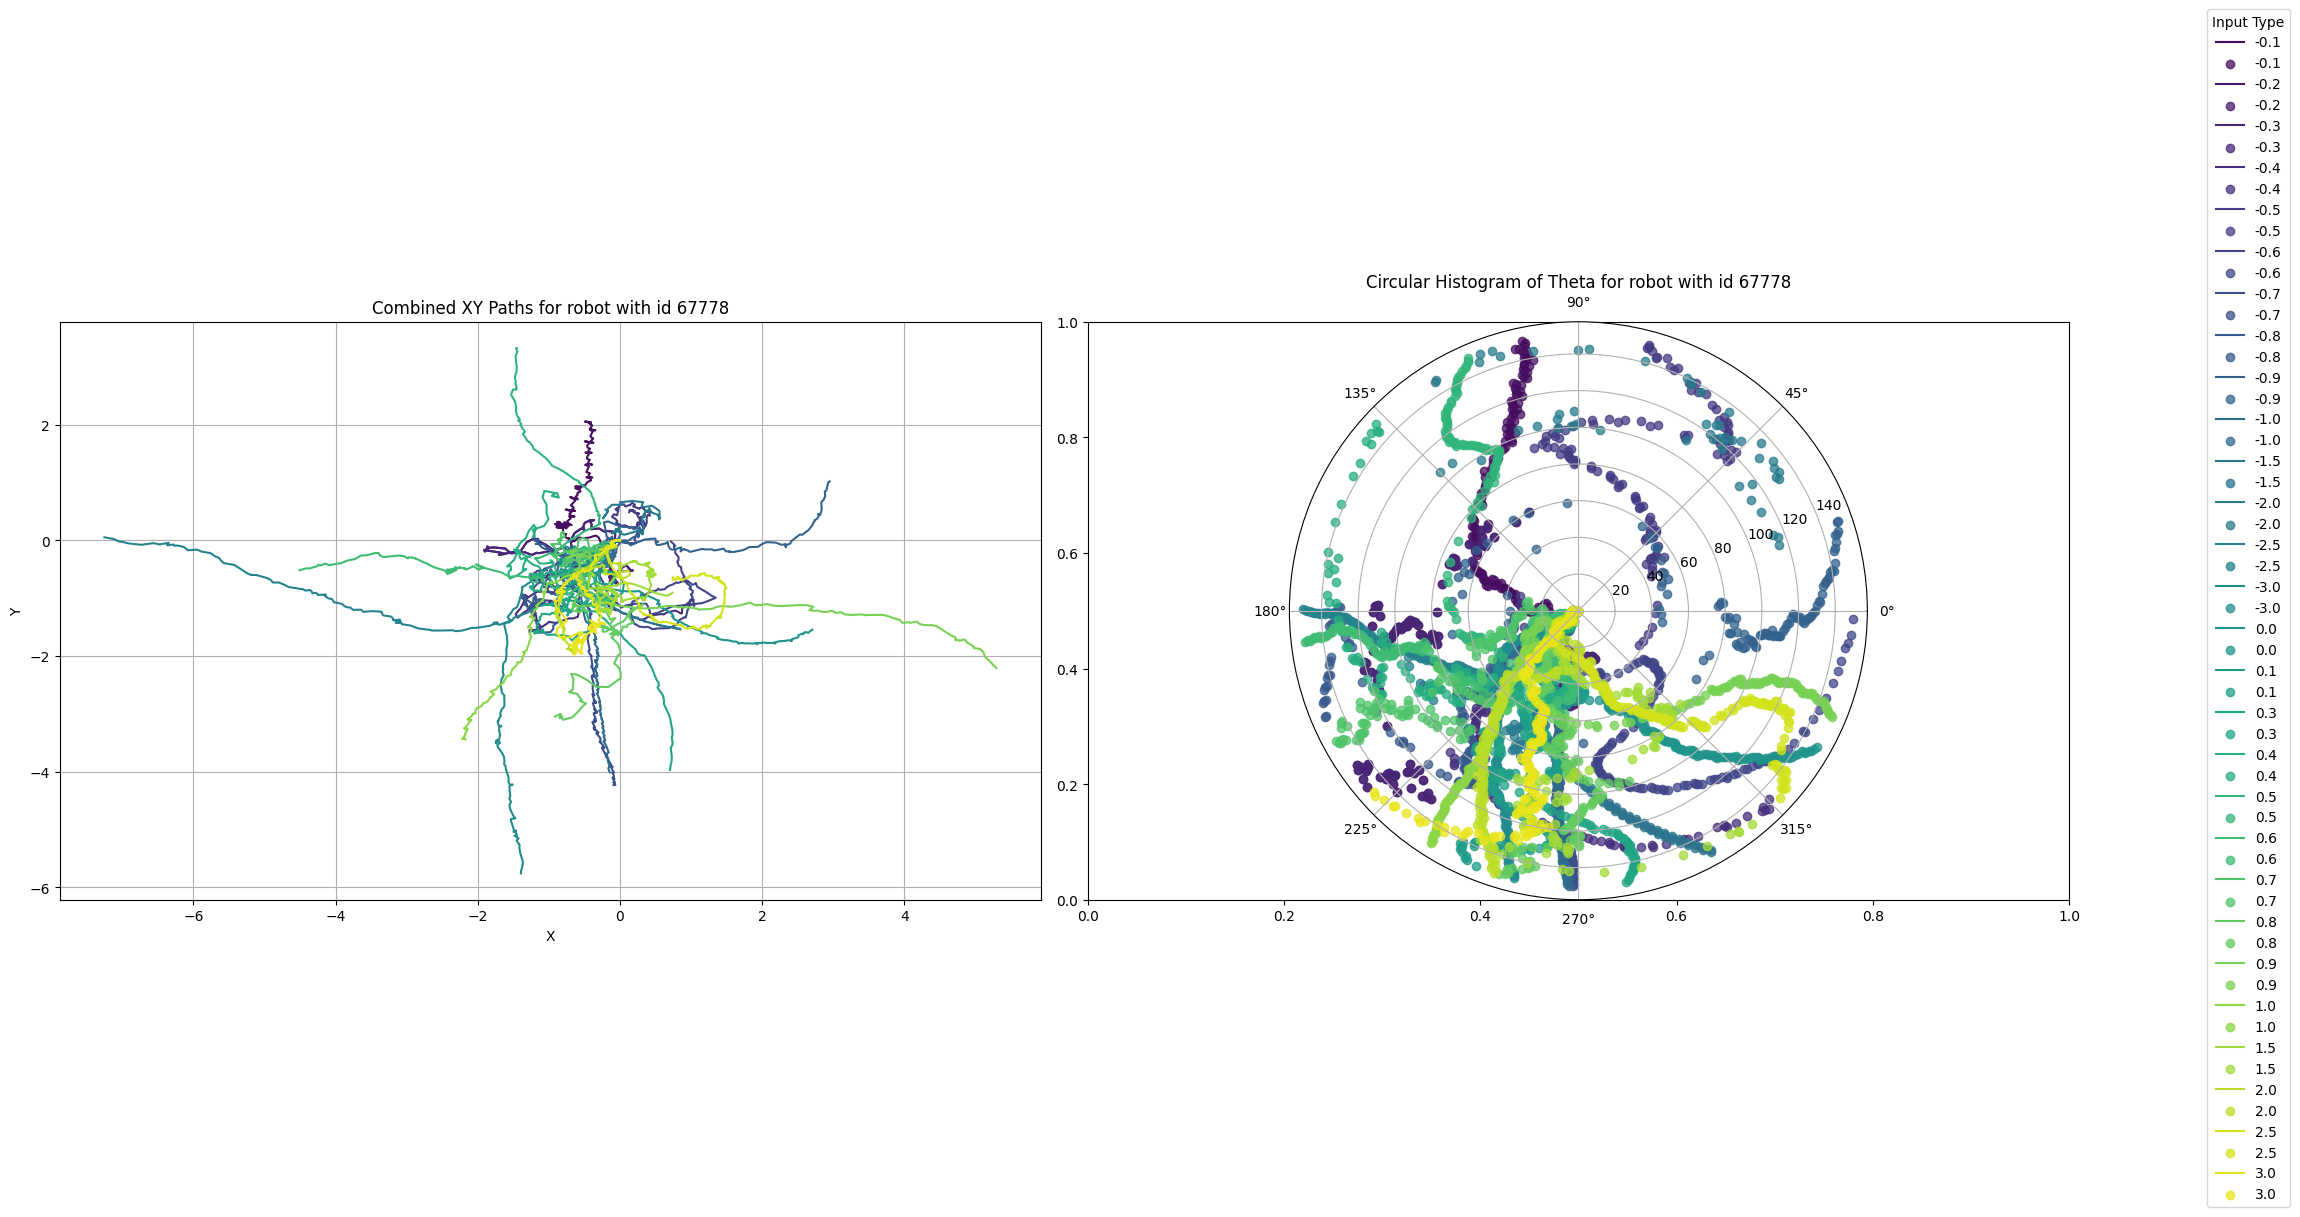

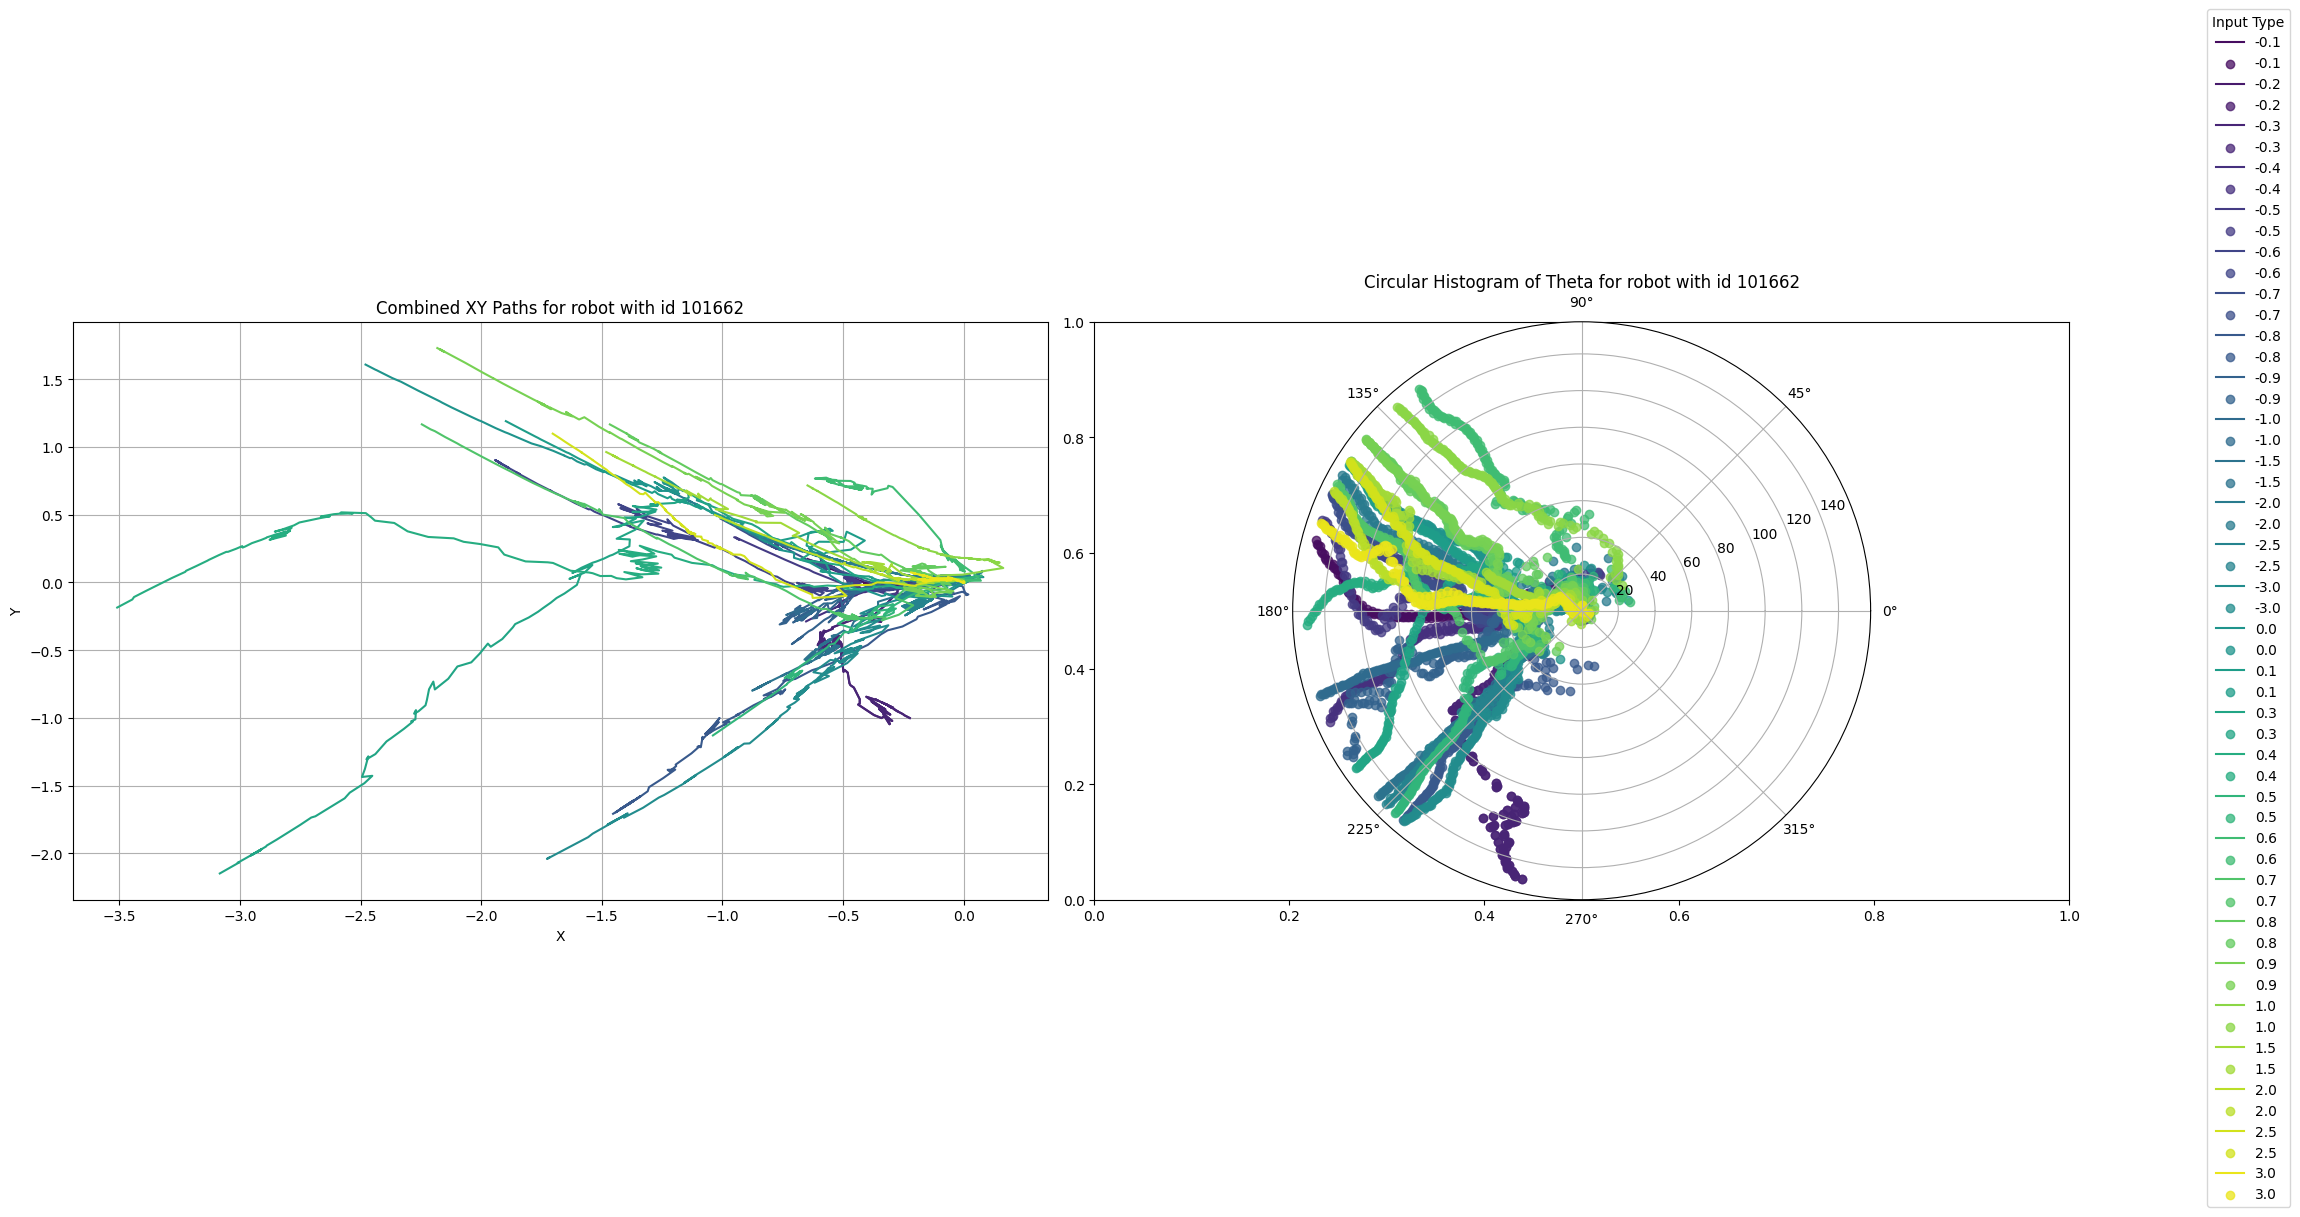

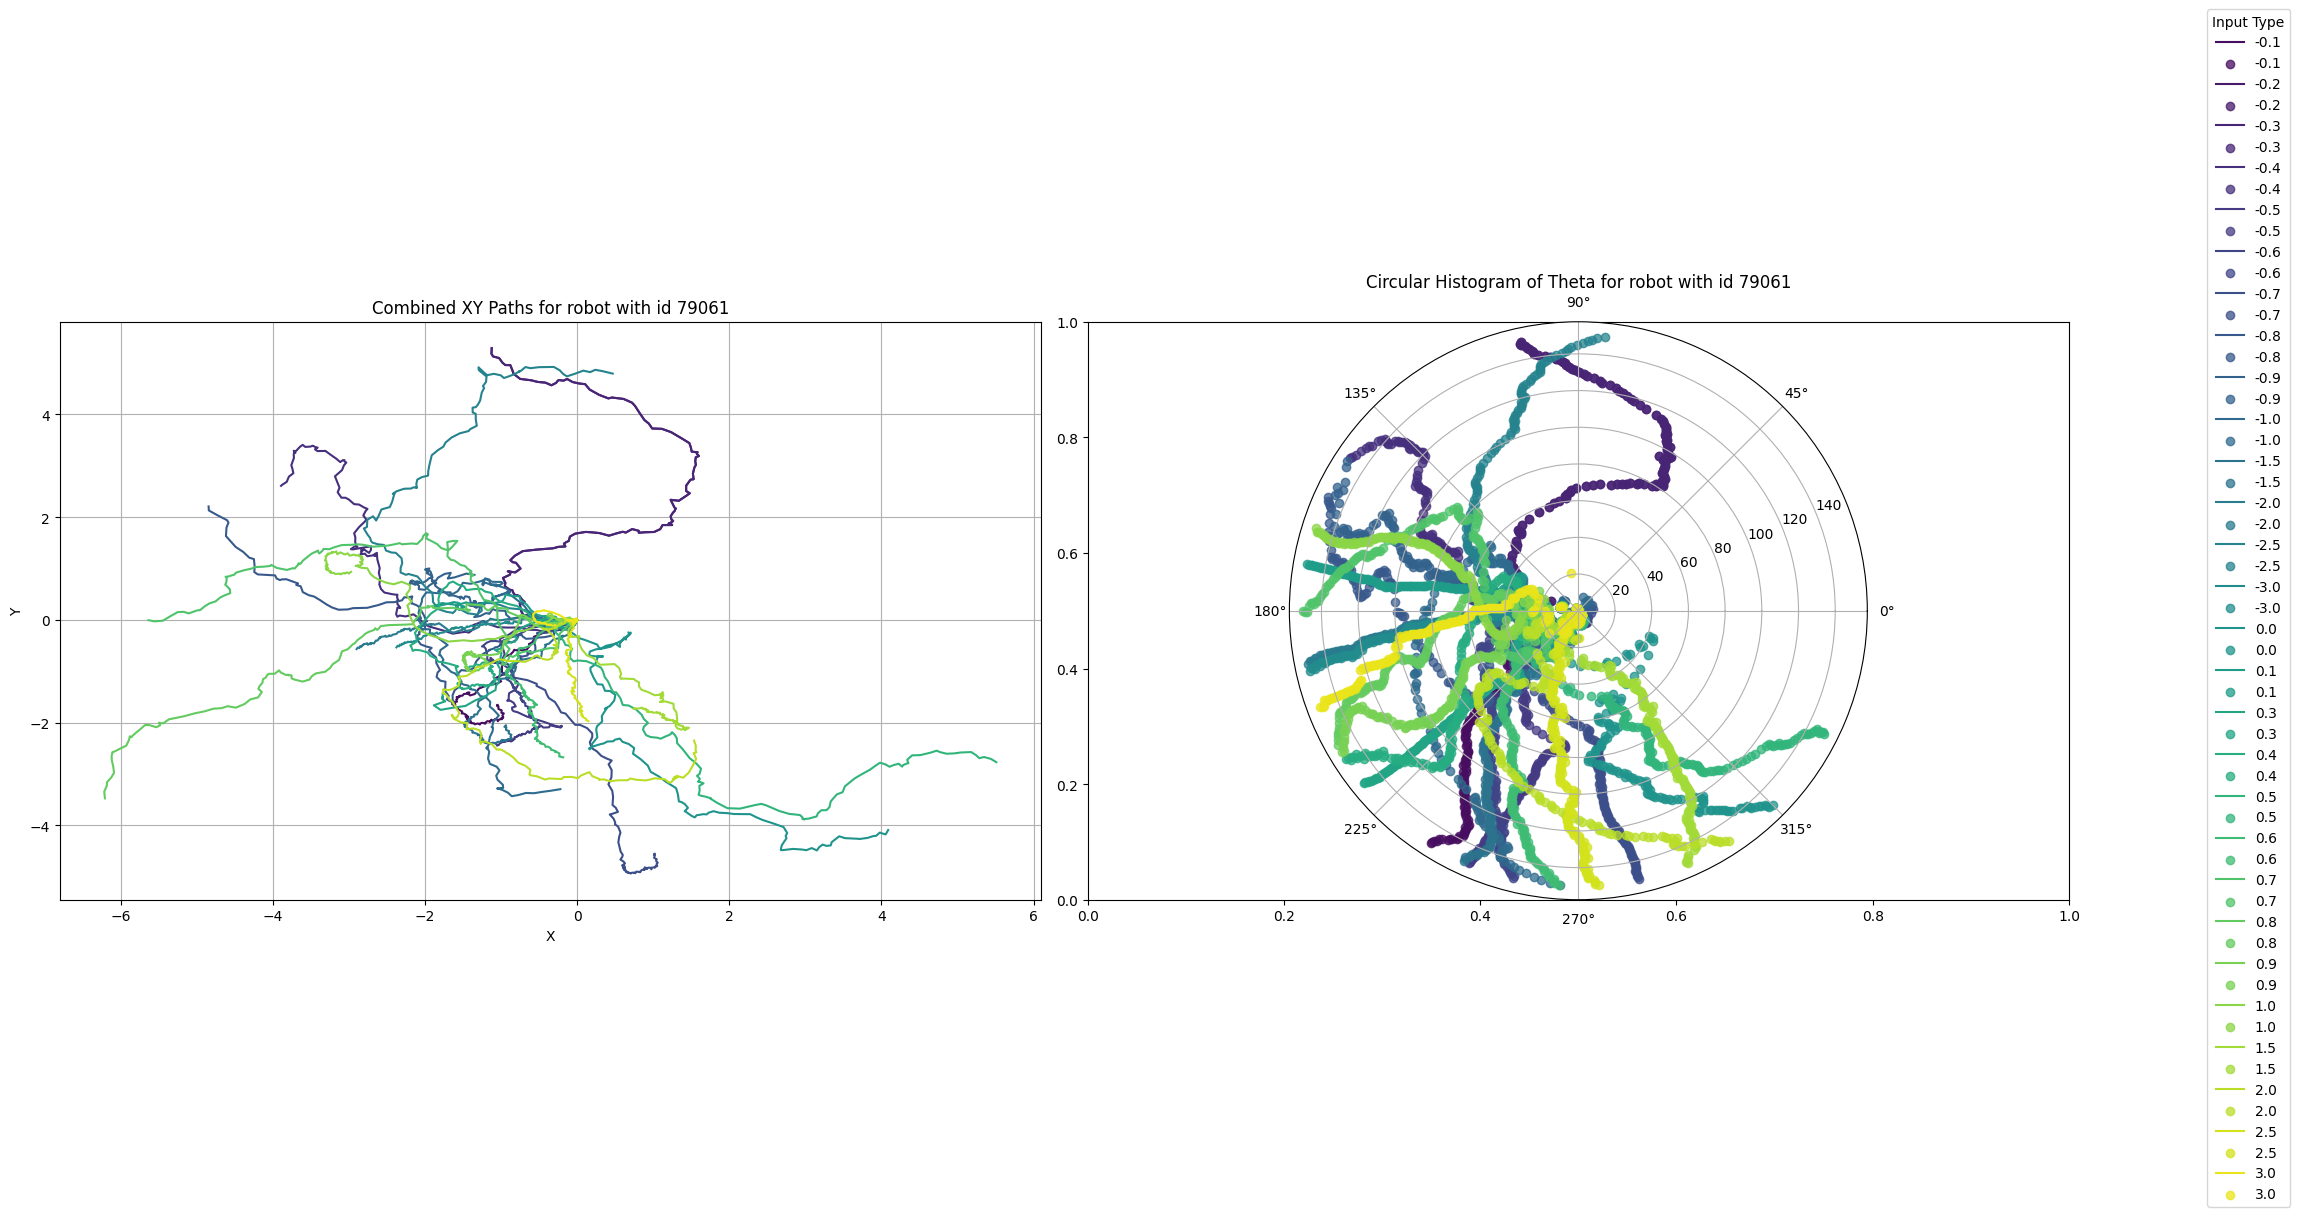

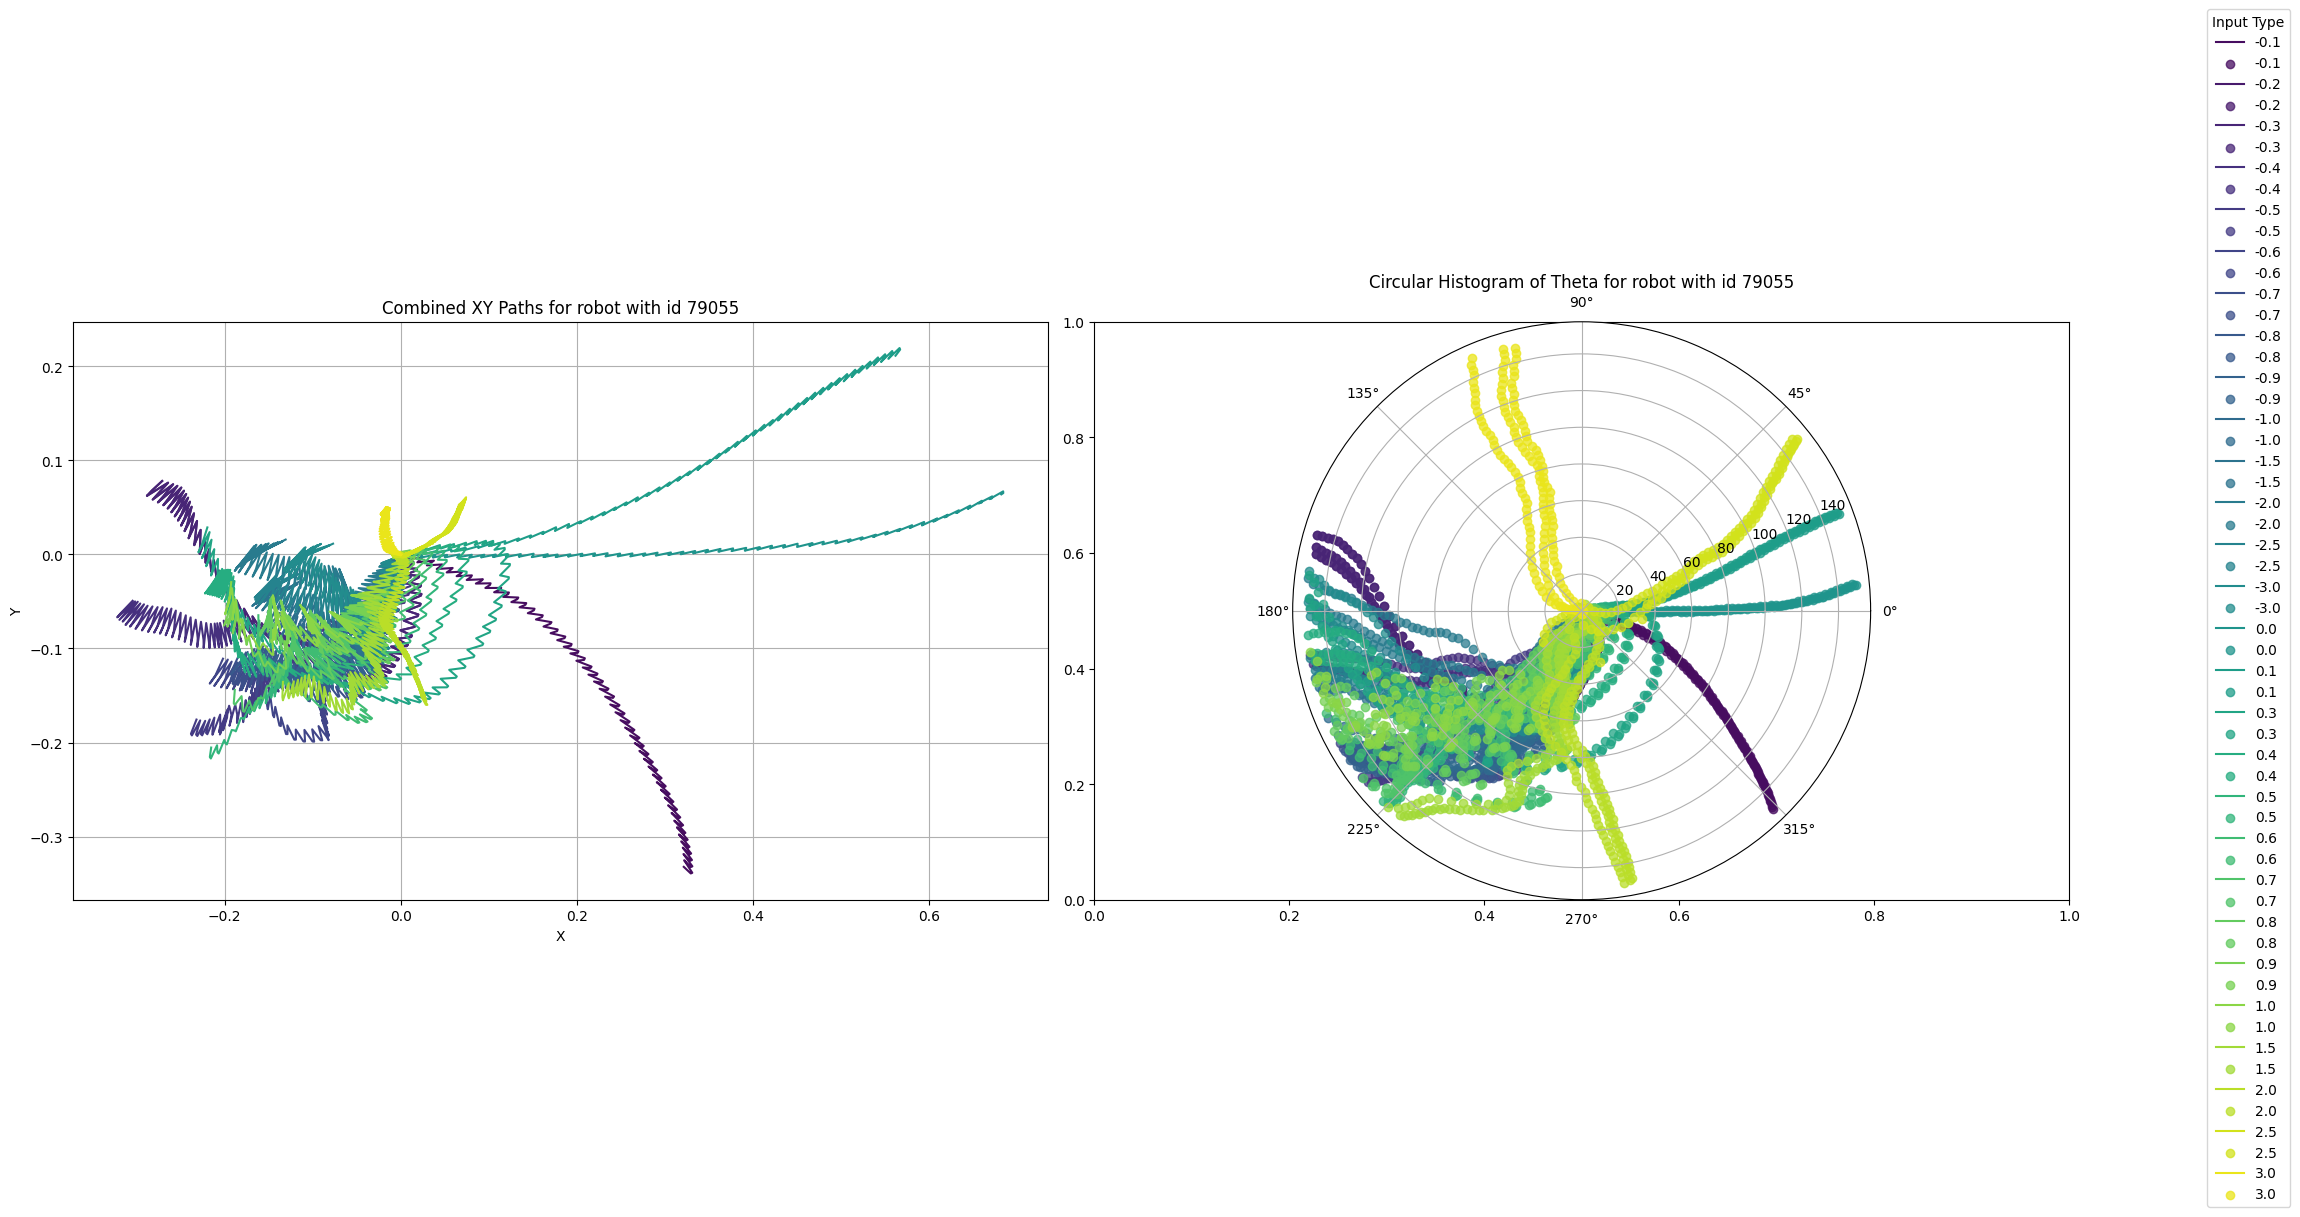

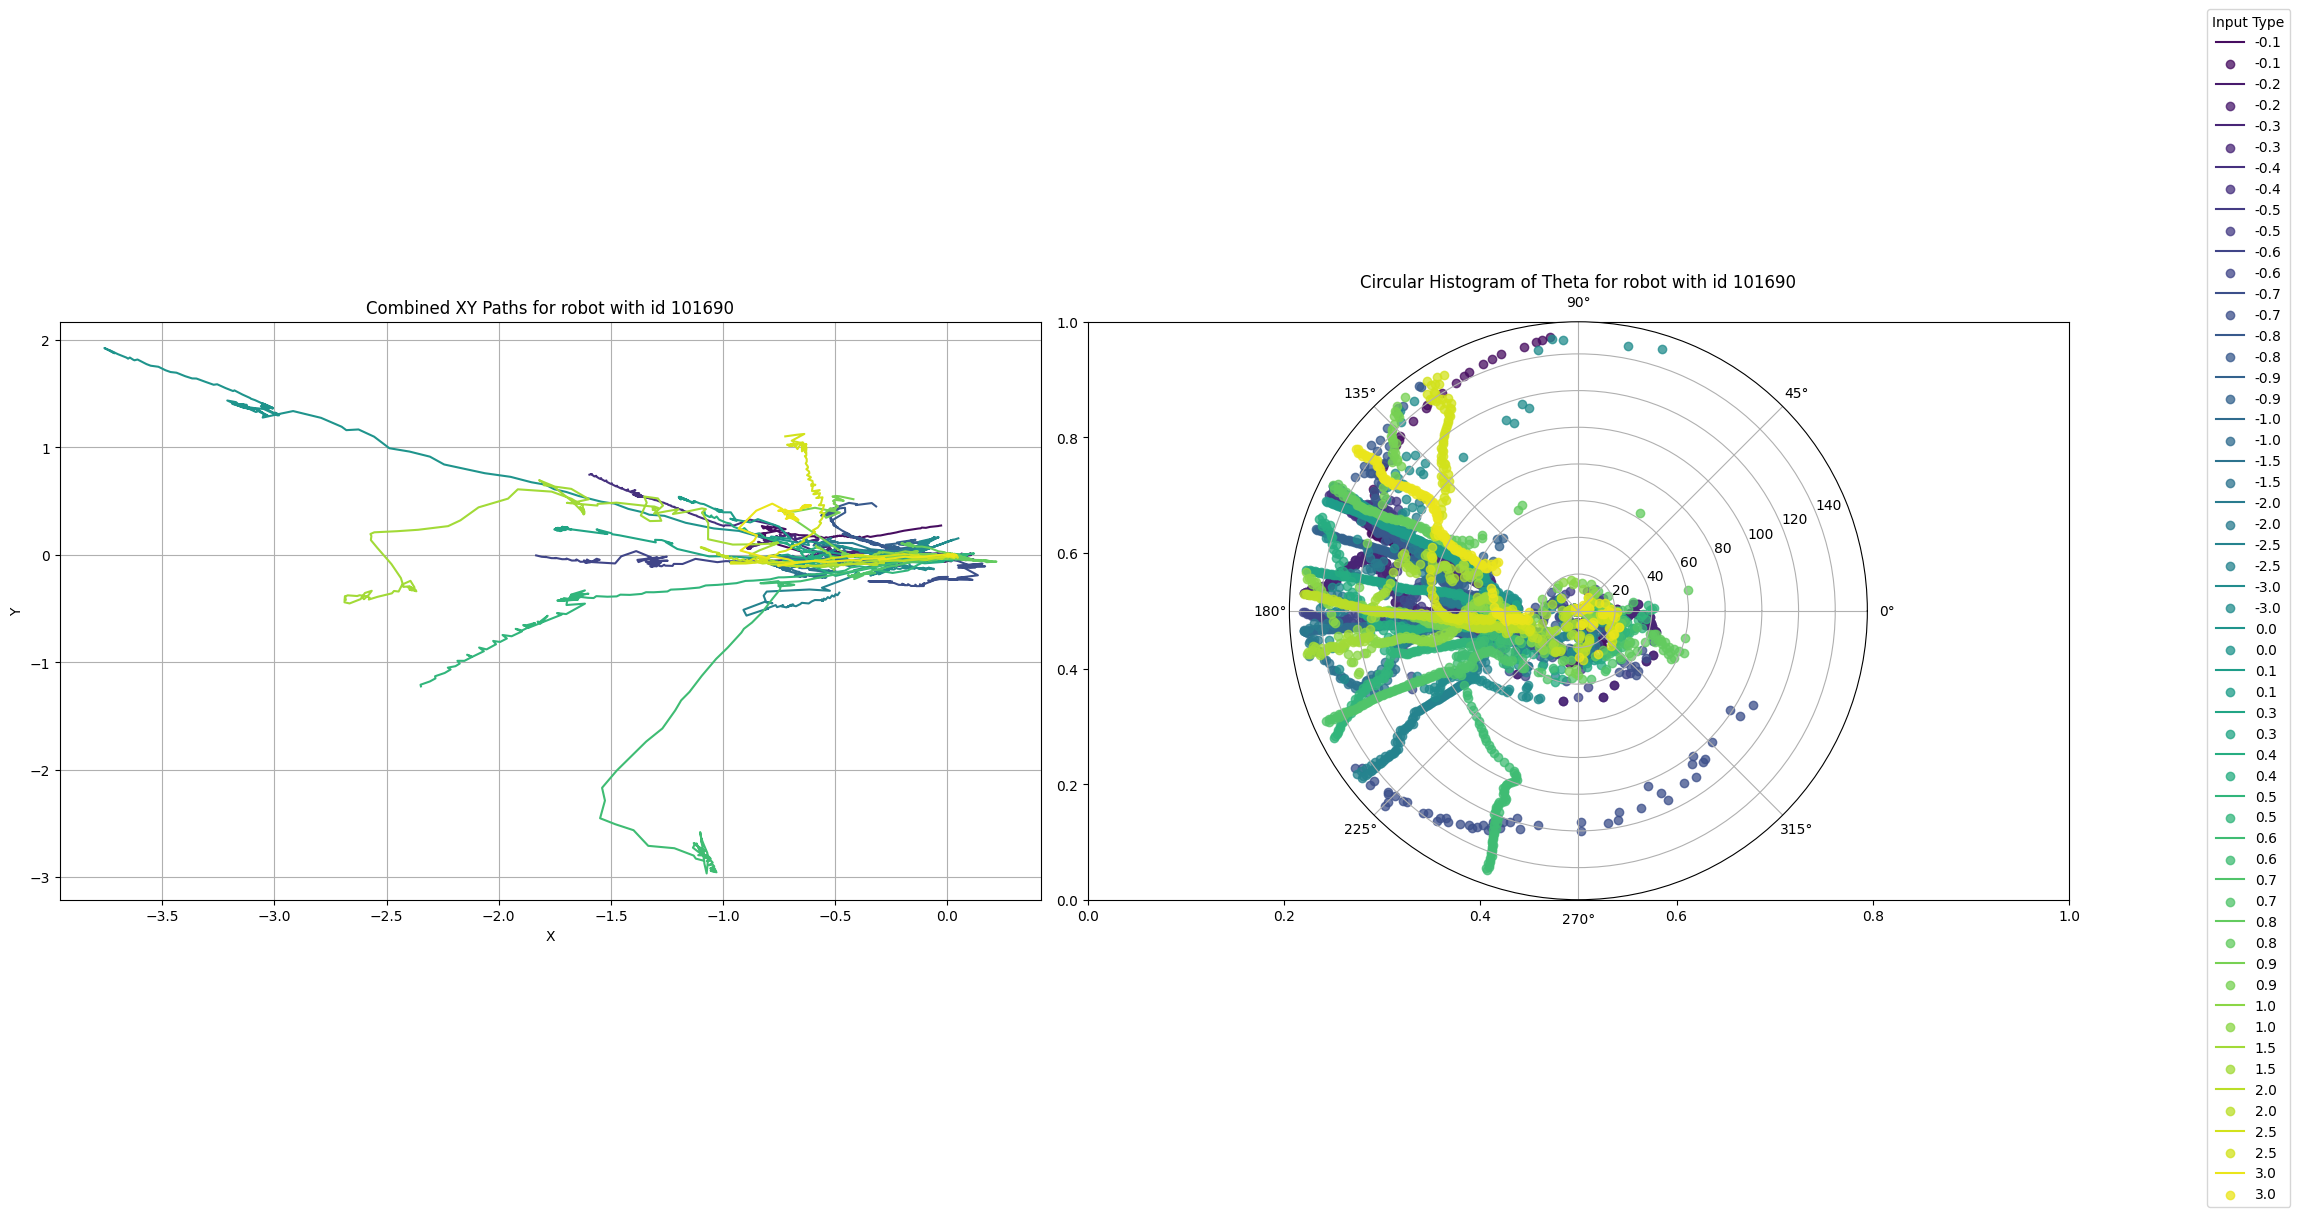

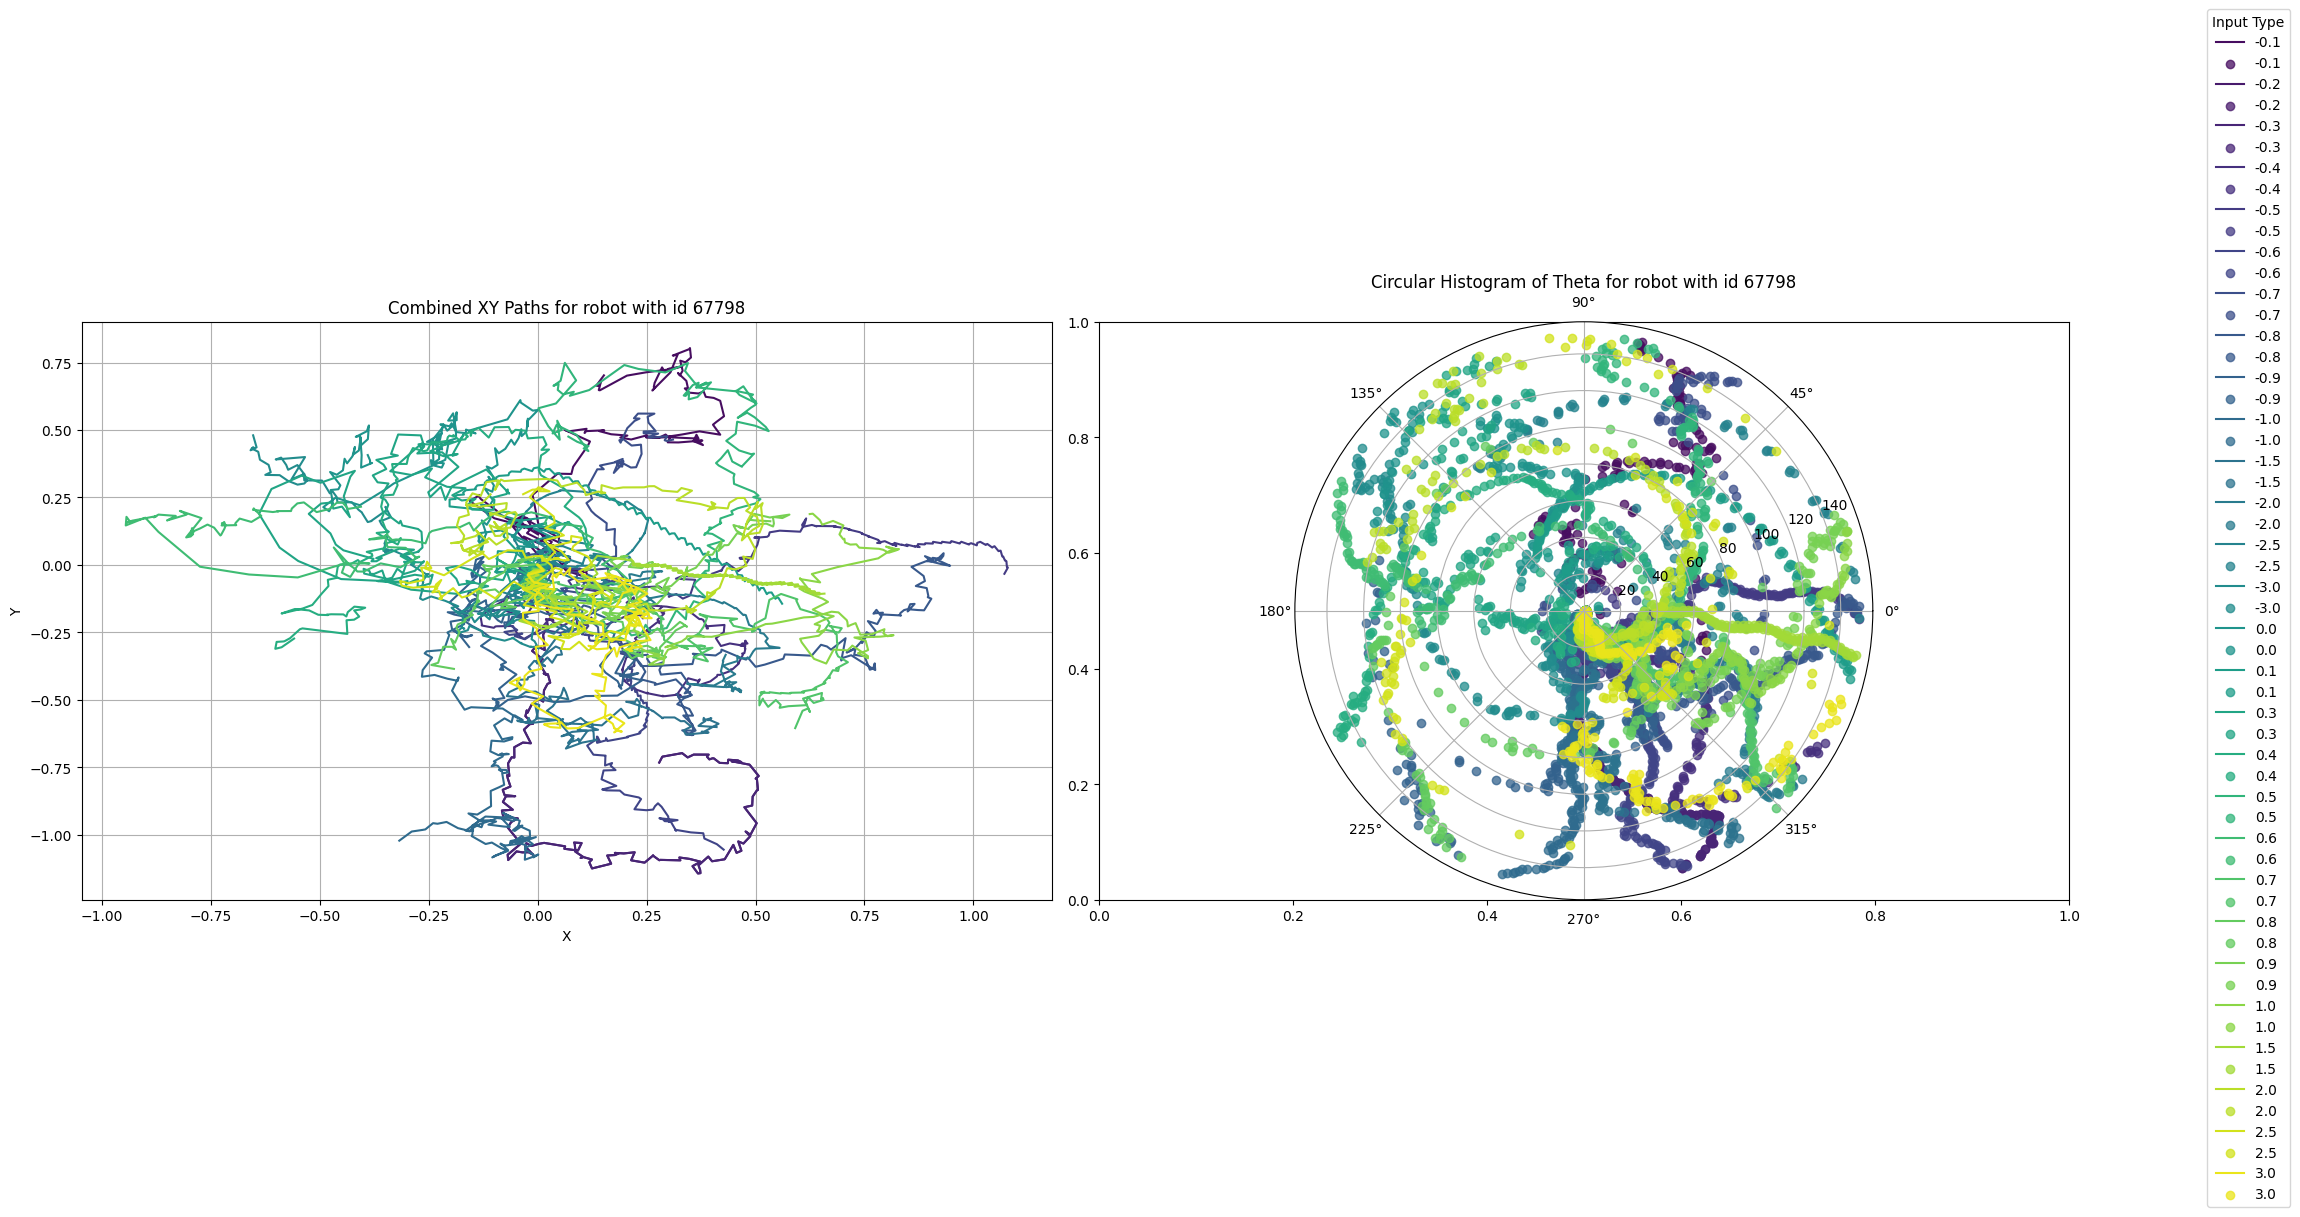

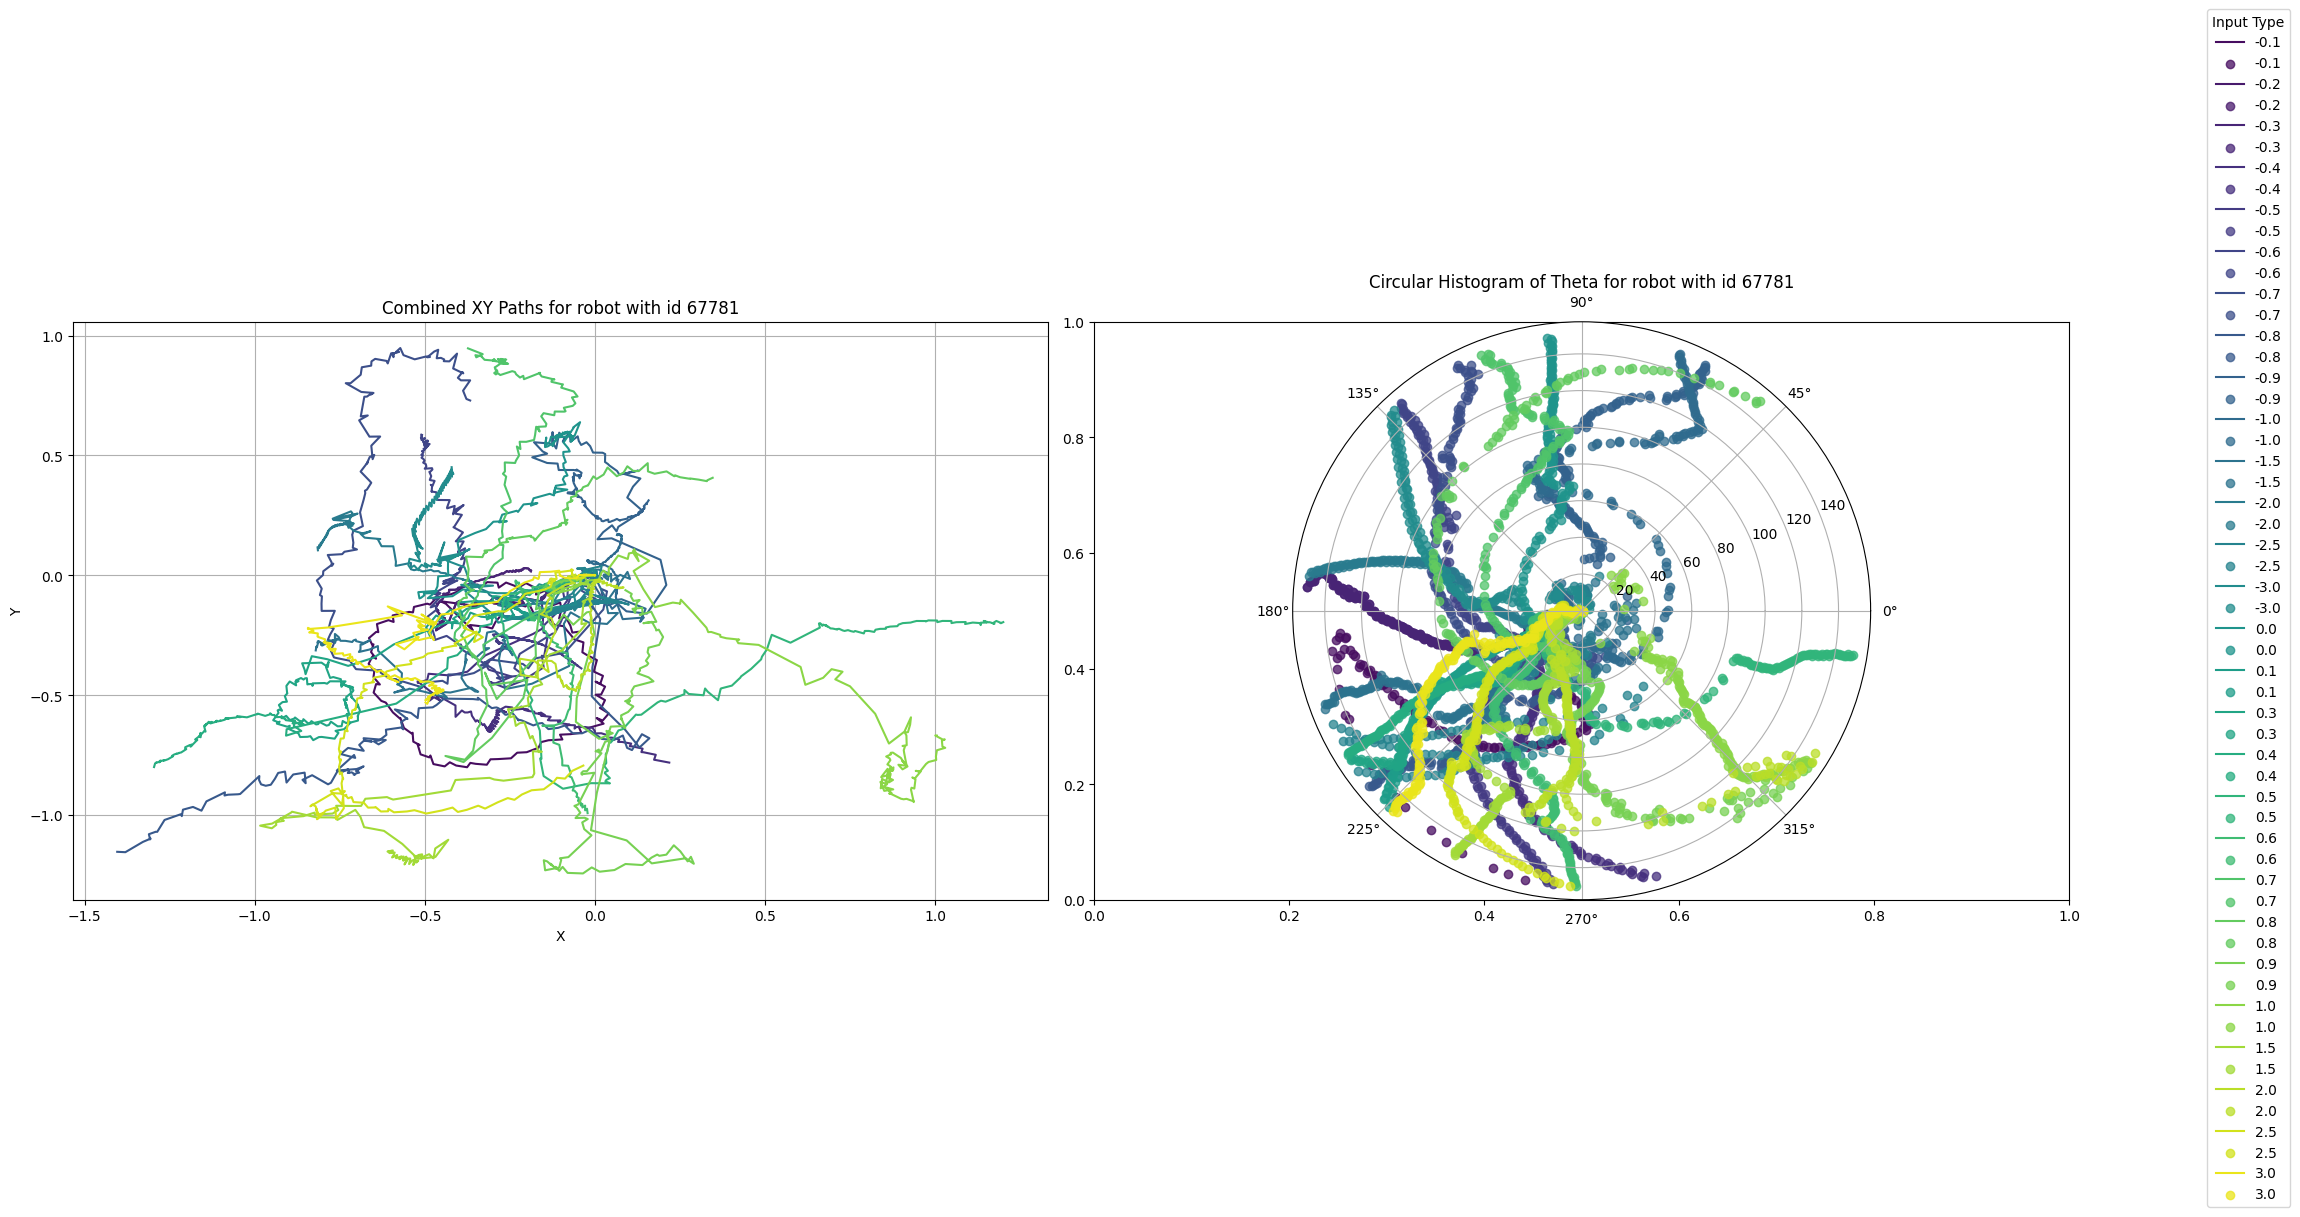

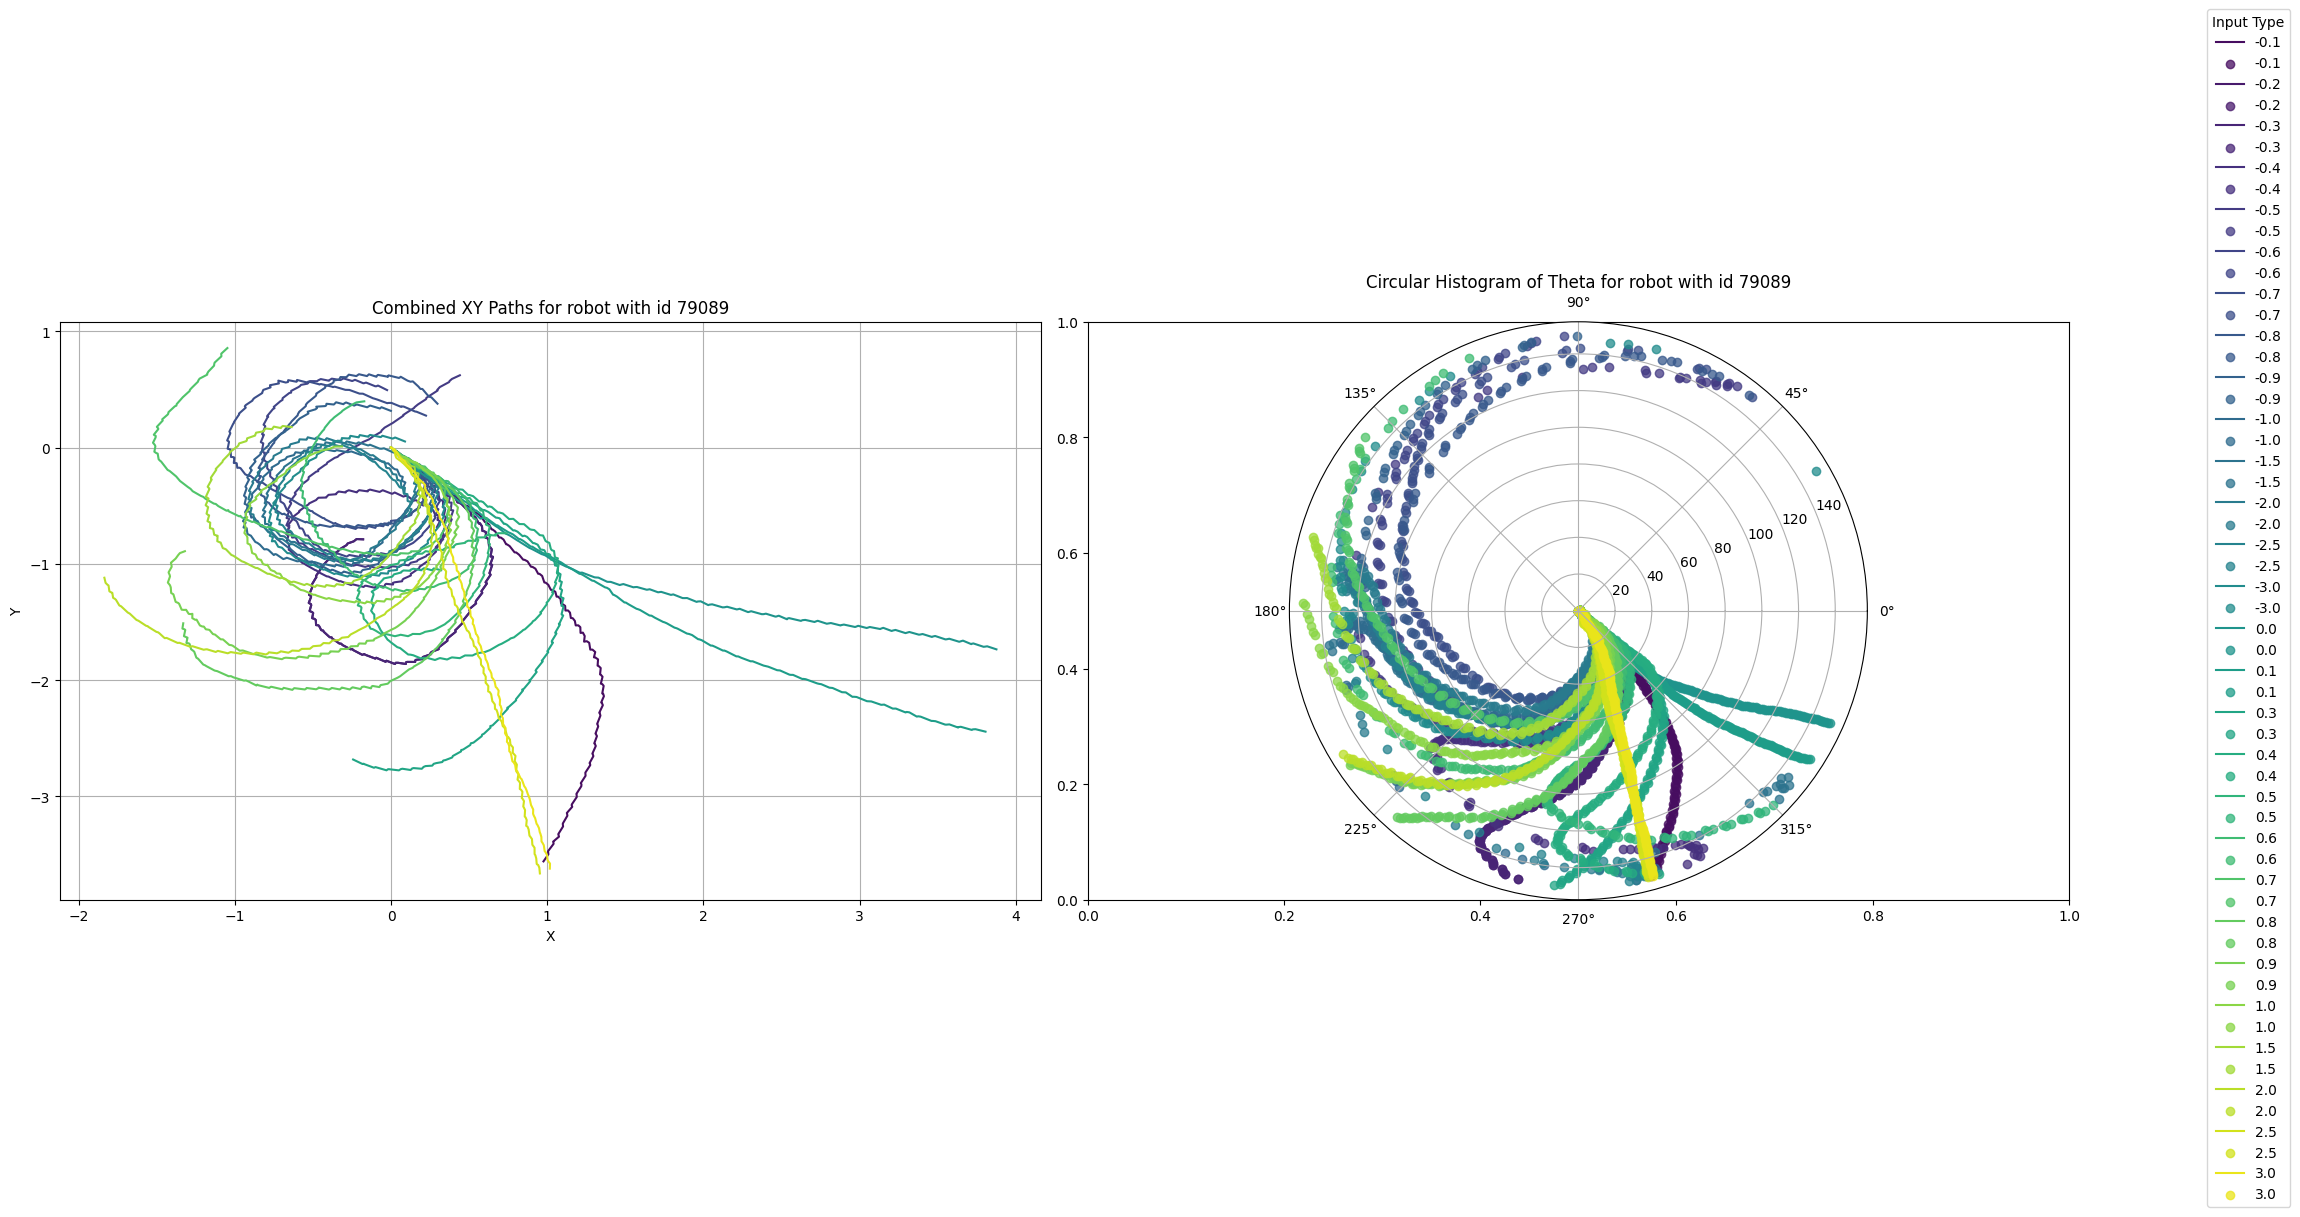

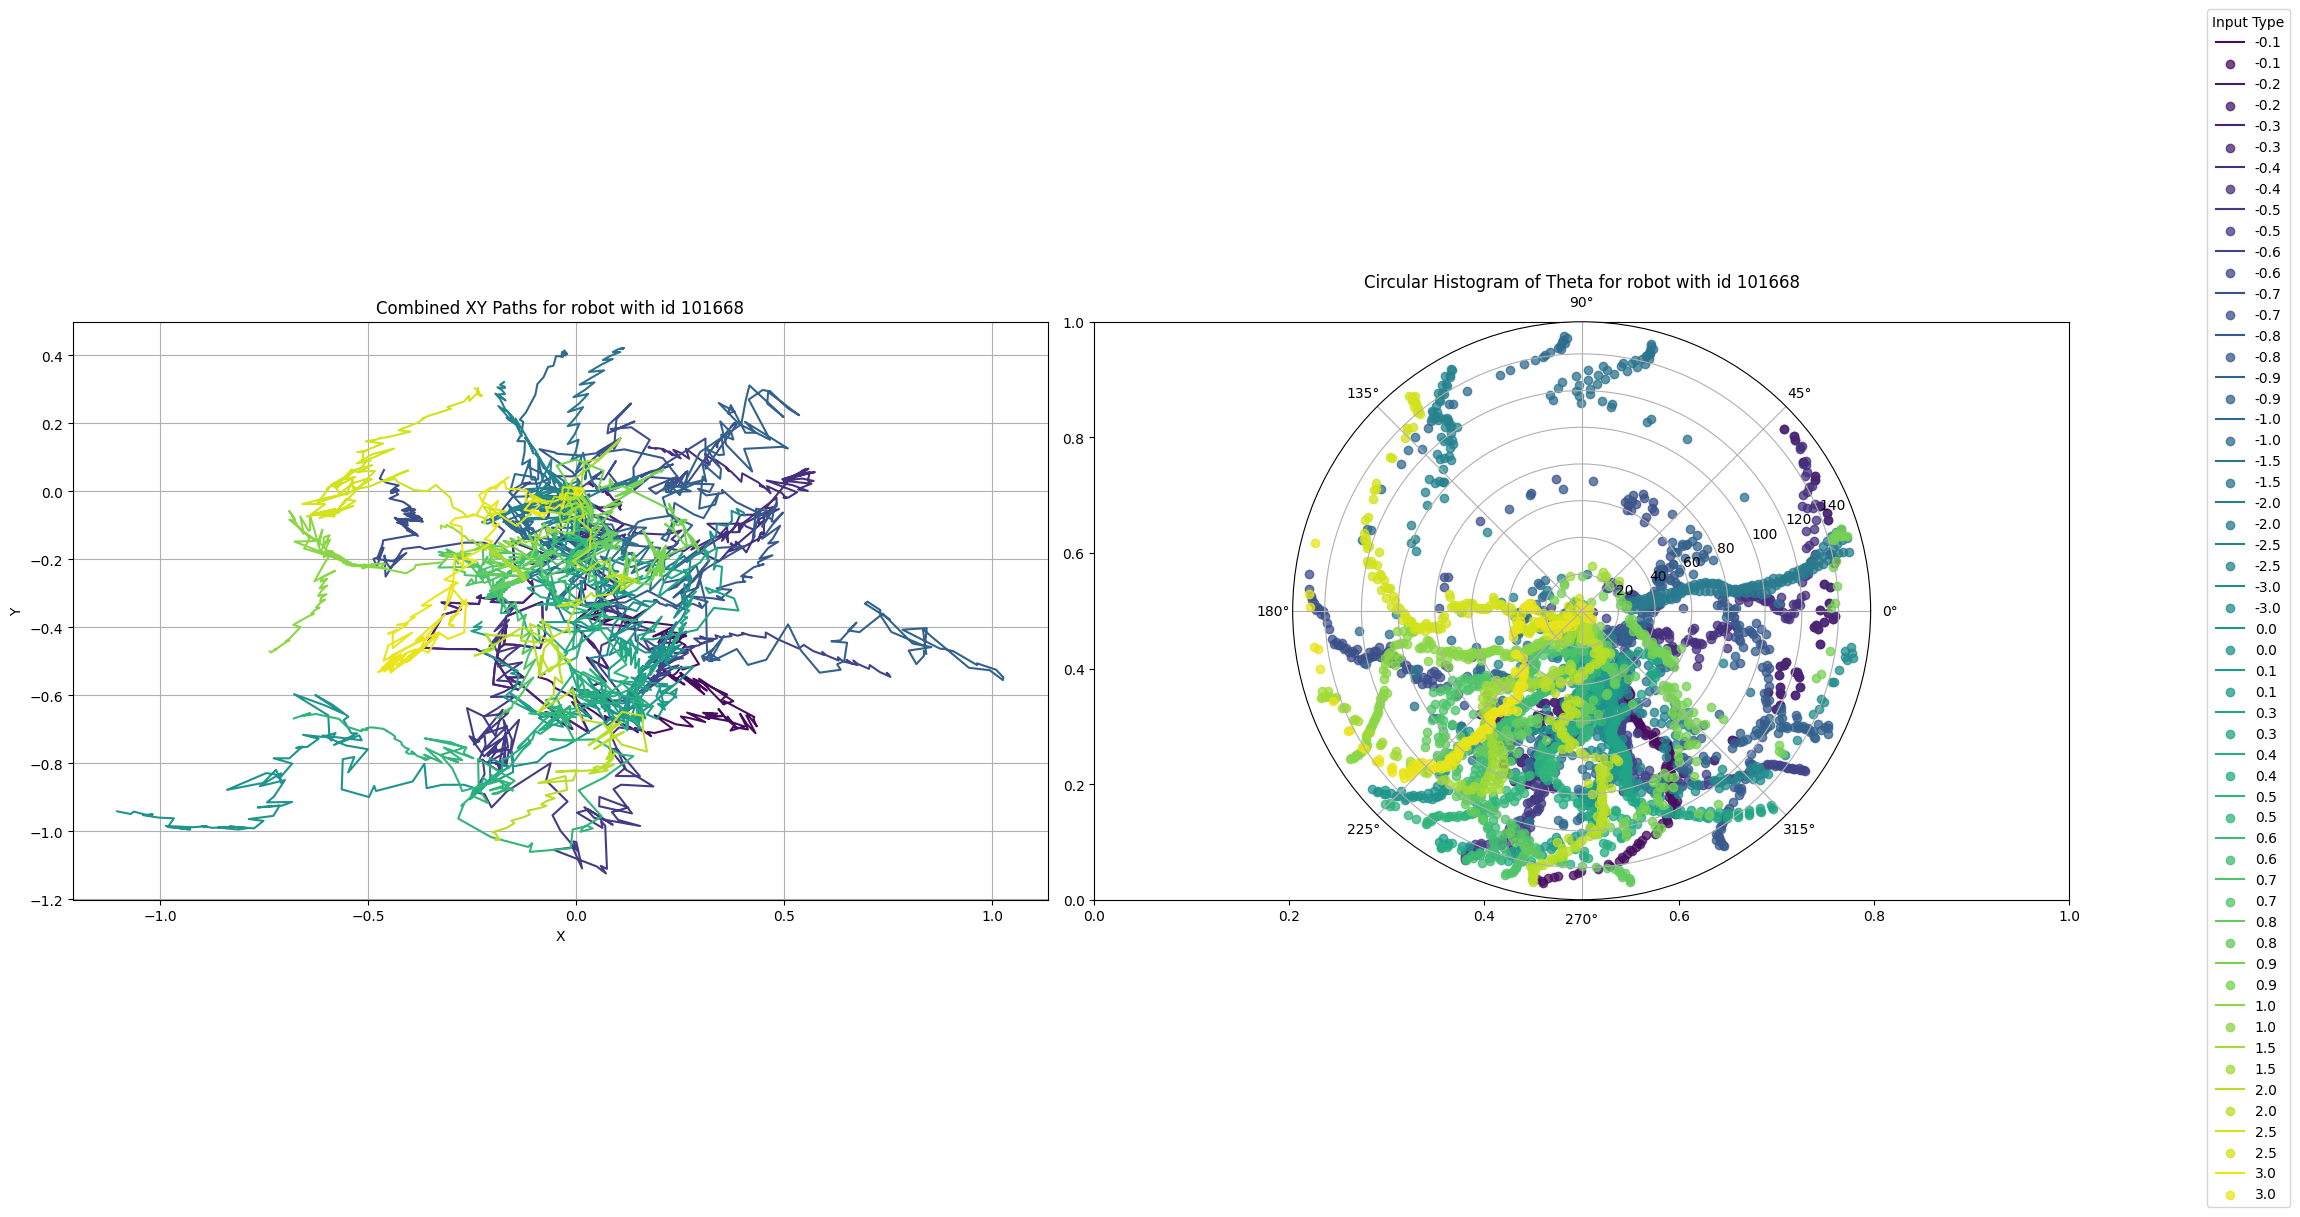

In [20]:
# Plot combined data
plot_combined_robot_data(data_dict)

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from scipy.stats import pearsonr

def get_data(base_directory):
    # Dictionary to store dataframes for each robot and input type
    robot_data = defaultdict(lambda: defaultdict(list))

    for subdir, _, files in os.walk(base_directory):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(subdir, file)
                df = pd.read_csv(file_path)

                # Check if necessary columns are in the dataframe
                required_columns = ['x', 'y', 'theta', 'fitness', 'attachment_length_max', 'attachment_length_mean', 
                                    'attachment_length_std', 'joint_brick_ratio', 'symmetry_incl_sum', 
                                    'symmetry_excl_sum', 'coverage', 'branching', 'surface']
                if all(col in df.columns for col in required_columns):
                    # Extract robot name and input type from filename
                    parts = file.split('_')
                    robot_name = parts[0]
                    input_type = parts[1]
                    robot_data[robot_name][input_type].append(df)

    return robot_data

def compute_correlation(value1, value2):
    """Compute Pearson correlation coefficient between two floating point numbers."""
    # Check if values are identical or either is NaN
    if np.isnan(value1) or np.isnan(value2) or value1 == value2:
        return np.nan  # Return NaN for undefined correlation
    
    # Compute correlation using numpy
    return np.corrcoef([value1], [value2])[0, 1]

def normalize_theta(theta):
    """Normalize theta to the range [0, 360)."""
    return (theta + 360) % 360

def analyze_correlations(robot_data):
    correlation_results = defaultdict(lambda: defaultdict(dict))
    additional_metrics = ['fitness', 'attachment_length_max', 'attachment_length_mean', 'attachment_length_std',
                          'joint_brick_ratio', 'symmetry_incl_sum', 'symmetry_excl_sum', 'coverage', 
                          'branching', 'surface']

    additional_data = defaultdict(lambda: defaultdict(float))

    for robot_name, input_data in robot_data.items():
        final_x = []
        final_y = []
        final_theta = []
        input_types = []

        # Initialize storage for additional columns
        additional_values = {metric: [] for metric in additional_metrics}

        for input_type, dataframes in input_data.items():
            combined_df = pd.concat(dataframes, ignore_index=True)
            
            if not combined_df.empty:
                final_x.append(combined_df['x'].iloc[-1])
                final_y.append(combined_df['y'].iloc[-1])
                # Normalize theta
                final_theta.append(normalize_theta(combined_df['theta'].iloc[-1]))
                input_types.append(input_type)
                
                # Collect additional column values
                for metric in additional_metrics:
                    additional_values[metric].append(combined_df[metric].iloc[0])

        if len(input_types) > 1:  # Ensure there is more than one input type for correlation
            # Convert input types to numerical values
            input_type_to_num = {input_type: idx for idx, input_type in enumerate(set(input_types))}
            numerical_inputs = [input_type_to_num[it] for it in input_types]
            
            # Convert lists to numpy arrays for correlation calculation
            numerical_inputs_array = np.array(numerical_inputs)
            final_x_array = np.array(final_x)
            final_y_array = np.array(final_y)
            final_theta_array = np.array(final_theta)

            # Compute correlations
            final_x_corr = np.corrcoef(numerical_inputs_array, final_x_array)[0, 1]
            final_y_corr = np.corrcoef(numerical_inputs_array, final_y_array)[0, 1]
            final_theta_corr = np.corrcoef(numerical_inputs_array, final_theta_array)[0, 1]
            
            correlation_results[robot_name]['Final X'] = final_x_corr
            correlation_results[robot_name]['Final Y'] = final_y_corr
            correlation_results[robot_name]['Final Theta'] = final_theta_corr
            
            # Store additional values for further correlation analysis
            for metric in additional_metrics:
                additional_data[robot_name][metric] = np.mean(additional_values[metric])  # Use the mean of collected values

    return correlation_results, additional_data, final_x_array, final_y_array, final_theta_array

def additional_metrics_correlation(additional_data, correlation_results):
    additional_metrics_corr_results = defaultdict(lambda: defaultdict(dict))
    
    for robot_name, metrics_data in additional_data.items():
        for metric_name, value in metrics_data.items():
            # Get previously calculated correlation results
            final_x_corr = correlation_results[robot_name]['Final X']
            final_y_corr = correlation_results[robot_name]['Final Y']
            final_theta_corr = correlation_results[robot_name]['Final Theta']
            
            # Compute correlations
            corr_final_x = compute_correlation(value, final_x_corr)
            corr_final_y = compute_correlation(value, final_y_corr)
            corr_final_theta = compute_correlation(value, final_theta_corr)
            
            additional_metrics_corr_results[robot_name][f'{metric_name} vs Final X'] = corr_final_x
            additional_metrics_corr_results[robot_name][f'{metric_name} vs Final Y'] = corr_final_y
            additional_metrics_corr_results[robot_name][f'{metric_name} vs Final Theta'] = corr_final_theta

    return additional_metrics_corr_results

In [24]:
# Base directory where combined_analysis is located
base_directory = 'ANALYSIS/10_with_ten_repetitions_database'

# Get data
data_dict = get_data(base_directory)

# Analyze correlations
correlation_results, additional_data, final_x_values, final_y_values, final_theta_values = analyze_correlations(data_dict)

final_x_correlations = [correlation_results[robot_name]["Final X"] for robot_name in correlation_results]
final_y_correlations = [correlation_results[robot_name]["Final Y"] for robot_name in correlation_results]
final_theta_correlations = [correlation_results[robot_name]["Final Theta"] for robot_name in correlation_results]

# Extract metrics
metrics_dict = defaultdict(list)

for key, values in additional_data.items():
    for metric, value in values.items():
        metrics_dict[metric].append(value)

# Convert defaultdict to dict for cleaner output
metrics_dict = dict(metrics_dict)
# print(metrics_dict.items())


# Print the metrics_dict to verify
for metric, values in metrics_dict.items():

    print(f'{metric} vs Final X: {np.corrcoef(values, final_x_correlations)[0, 1]}')
    print(f'{metric} vs Final Y: {np.corrcoef(values, final_y_correlations)[0, 1]}')
    print(f'{metric} vs Final Theta: {np.corrcoef(values, final_theta_correlations)[0, 1]}')

fitness vs Final X: 0.26418524785048514
fitness vs Final Y: -0.5332257570238843
fitness vs Final Theta: 0.026396706426678237
attachment_length_max vs Final X: 0.8859473774048555
attachment_length_max vs Final Y: 0.23404813371344
attachment_length_max vs Final Theta: 0.5719150825726025
attachment_length_mean vs Final X: 0.7968881154191605
attachment_length_mean vs Final Y: 0.37832888921720603
attachment_length_mean vs Final Theta: 0.5792272240851494
attachment_length_std vs Final X: -0.12229192717231087
attachment_length_std vs Final Y: -0.3345161759339751
attachment_length_std vs Final Theta: -0.29874757714489103
joint_brick_ratio vs Final X: 0.4444438576199185
joint_brick_ratio vs Final Y: 0.4147133278827879
joint_brick_ratio vs Final Theta: 0.06318562717655342
symmetry_incl_sum vs Final X: -0.4396069134702486
symmetry_incl_sum vs Final Y: 0.027230174612406656
symmetry_incl_sum vs Final Theta: -0.6076975124661401
symmetry_excl_sum vs Final X: -0.6416198052906139
symmetry_excl_sum vs F

/tmp/ipykernel_158244/842788888.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Input Value", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


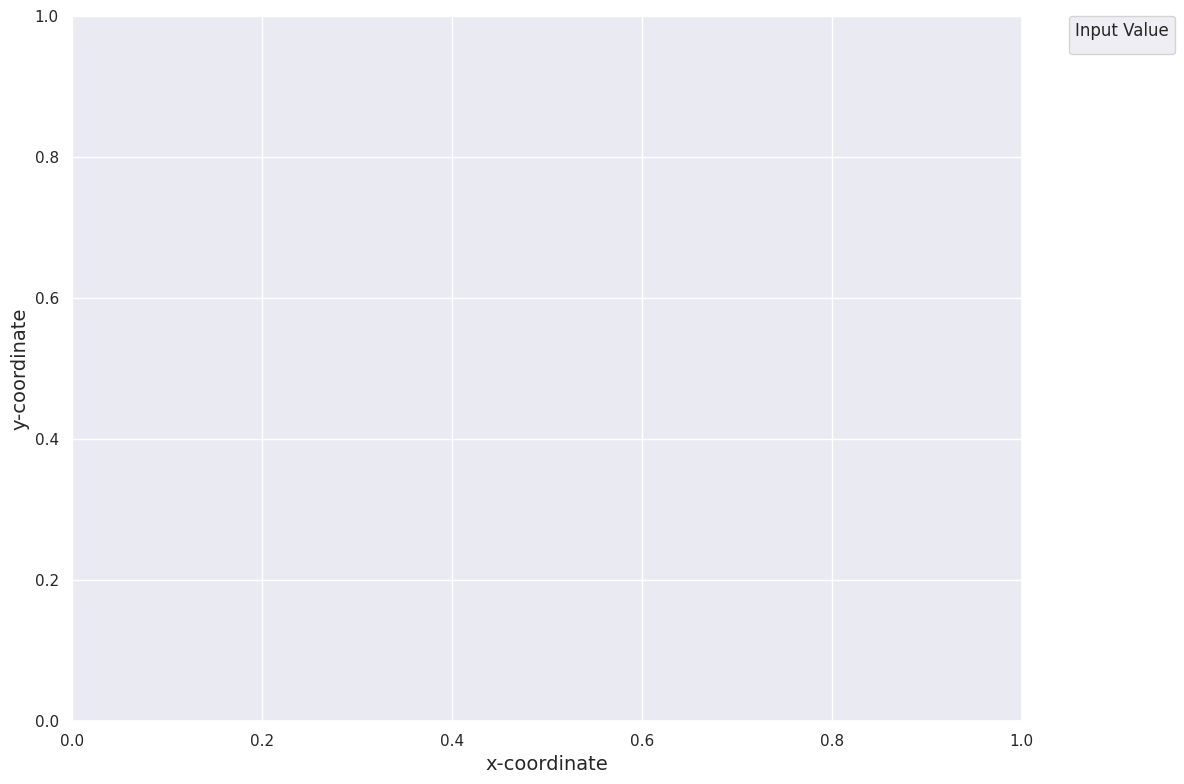

In [131]:
# Sort the data dictionary by keys in descending order
sorted_data_dict = dict(sorted(data_dict.items(), key=lambda item: item[0], reverse=True))

# Set a consistent style and color palette
sns.set(style="darkgrid")
colors = sns.color_palette("coolwarm", len(sorted_data_dict))

# Plot all paths
plt.figure(figsize=(12, 8))
for (input_value, df), color in zip(sorted_data_dict.items(), colors):
    plt.plot(df['x'], df['y'], label=f'Input {input_value}', color=color, alpha=0.8)
plt.xlabel('x-coordinate', fontsize=14)
plt.ylabel('y-coordinate', fontsize=14)
plt.legend(title="Input Value", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.grid(True)
plt.show()



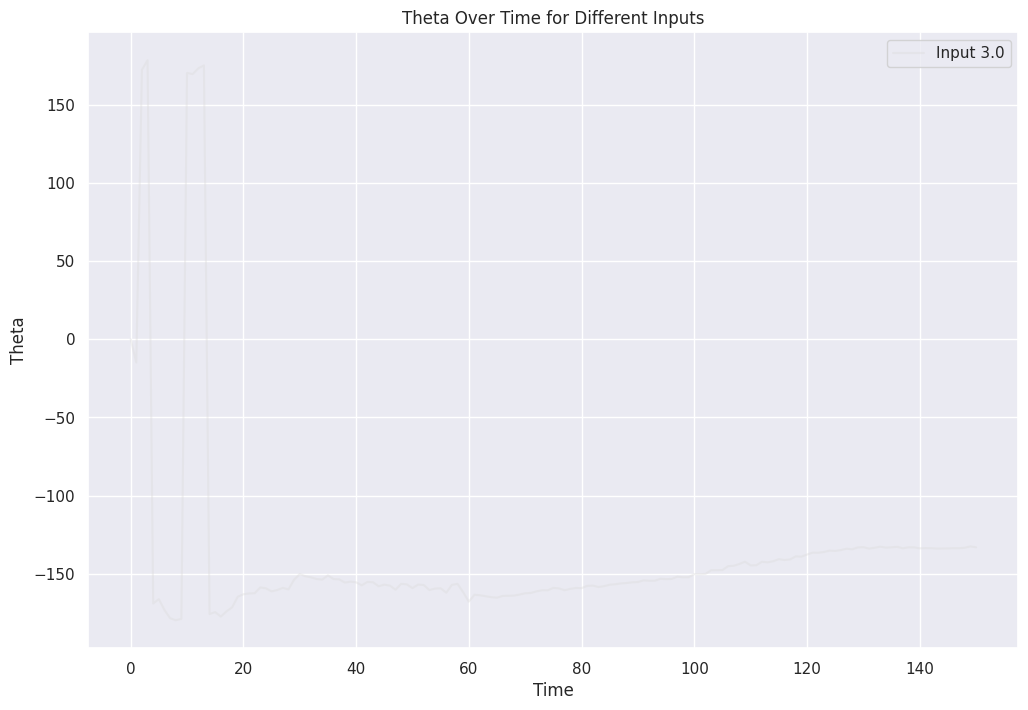

In [140]:
# Sort the data dictionary by keys in descending order
sorted_data_dict = dict(sorted(data_dict.items(), key=lambda item: item[0], reverse=True))

# Set a consistent style and color palette
sns.set(style="darkgrid")
colors = sns.color_palette("coolwarm", len(sorted_data_dict))

# Plot theta values over the index
plt.figure(figsize=(12, 8))
for (input_value, df), color in zip(sorted_data_dict.items(), colors):
    plt.plot(df.index, df['theta'], label=f'Input {input_value}', color=color, alpha=0.4)
plt.xlabel('Time')
plt.ylabel('Theta')
plt.title('Theta Over Time for Different Inputs')
plt.legend()
plt.show()

In [176]:
# Function to calculate path length
def calculate_path_length(df):
    return np.sum(np.sqrt(np.diff(df['x'])**2 + np.diff(df['y'])**2))

# Collect statistics in a dictionary
stats_dict = {}
for input_value, df in data_dict.items():
    stats = df.describe()
    path_length = calculate_path_length(df)
    stats_dict[input_value] = {
        'descriptive_stats': stats,
        'path_length': path_length
    }

# Print descriptive statistics and path lengths
for input_value, stats in stats_dict.items():
    print(f"Input: {input_value}")
    print("Descriptive Statistics:")
    print(stats['descriptive_stats'])
    print(f"Path Length: {stats['path_length']}\n")


In [175]:
# Plot path lengths for comparison
input_values = list(stats_dict.keys())
path_lengths = [stats_dict[input_value]['path_length'] for input_value in input_values]

plt.figure(figsize=(12, 6))
plt.bar(input_values, path_lengths)
plt.xlabel('Input Value')
plt.ylabel('Path Length')
plt.title('Path Length for Different Inputs')
plt.show()

# Optional: Add more comparative analysis like correlation analysis or clustering


Correlation coefficient (Theta): -0.4064401914700788
P-value (Theta): 0.023273444501625978
Correlation coefficient (Y): -0.3159629991216181
P-value (Y): 0.08334698505258595
Correlation coefficient (X): -0.1369729525945708
P-value (X): 0.4624812800583925


/tmp/ipykernel_2495740/1163805788.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


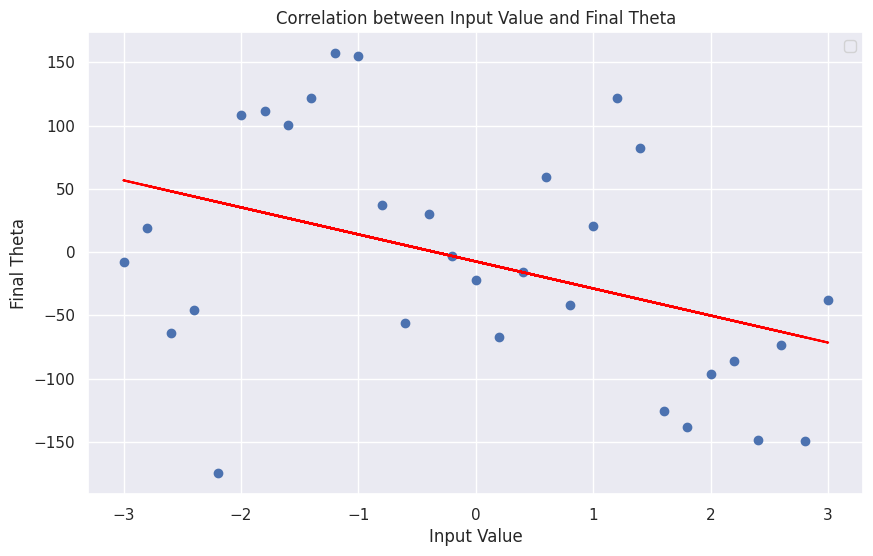

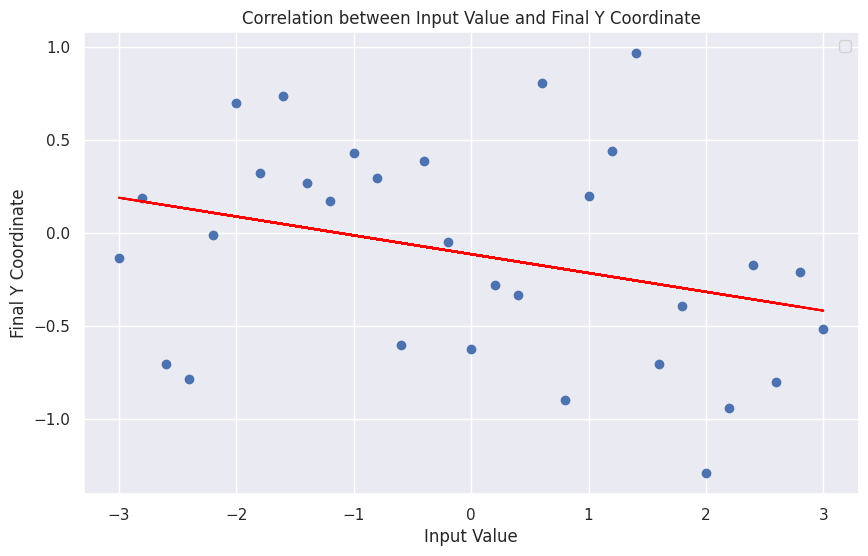

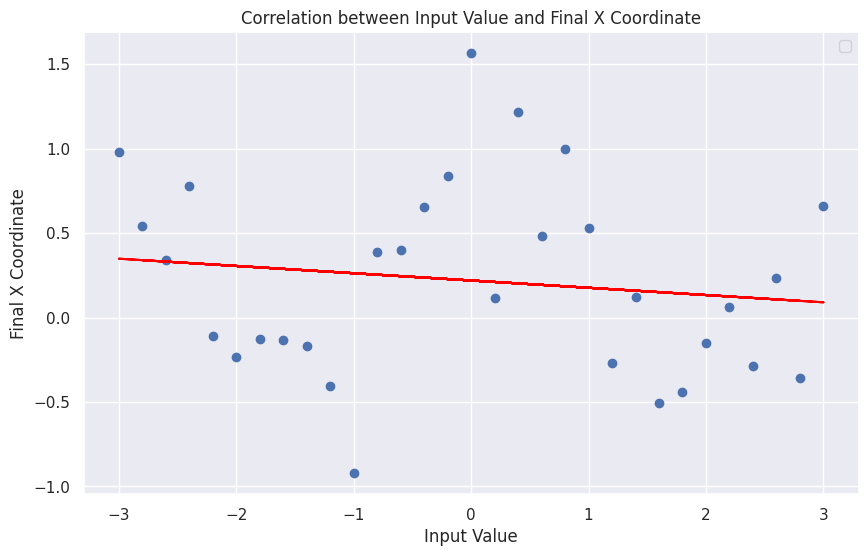

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.stats import pearsonr

# Function to load all CSV files
def load_all_data(folder_path):
    file_pattern = f"{folder_path}/*_xy_theta.csv"
    all_files = glob.glob(file_pattern)
    data_dict = {}
    for file in all_files:
        input_value = float(file.split('/')[-1].split('_')[0])
        data_dict[input_value] = pd.read_csv(file)
    return data_dict

# Load data from the specified folder
data_dict = load_all_data('10_5_600')

# Extract final theta, x, and y values
final_theta_values = {input_value: df['theta'].iloc[-1] for input_value, df in data_dict.items()}
final_y_values = {input_value: df['y'].iloc[-1] for input_value, df in data_dict.items()}
final_x_values = {input_value: df['x'].iloc[-1] for input_value, df in data_dict.items()}

# Convert to DataFrame for easier manipulation
final_values_df = pd.DataFrame(list(final_theta_values.items()), columns=['input', 'final_theta'])
final_values_df['final_y'] = final_values_df['input'].map(final_y_values)
final_values_df['final_x'] = final_values_df['input'].map(final_x_values)

# Calculate correlation for final theta
theta_corr_coefficient, theta_p_value = pearsonr(final_values_df['input'], final_values_df['final_theta'])
print(f"Correlation coefficient (Theta): {theta_corr_coefficient}")
print(f"P-value (Theta): {theta_p_value}")

# Calculate correlation for final y
y_corr_coefficient, y_p_value = pearsonr(final_values_df['input'], final_values_df['final_y'])
print(f"Correlation coefficient (Y): {y_corr_coefficient}")
print(f"P-value (Y): {y_p_value}")

# Calculate correlation for final x
x_corr_coefficient, x_p_value = pearsonr(final_values_df['input'], final_values_df['final_x'])
print(f"Correlation coefficient (X): {x_corr_coefficient}")
print(f"P-value (X): {x_p_value}")

# Function to plot scatter plot with regression line
def plot_with_regression(x, y, xlabel, ylabel, title, corr_coef, p_value):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y)
    
    # Fit regression line
    coeffs = np.polyfit(x, y, 1)
    poly_eqn = np.poly1d(coeffs)
    plt.plot(x, poly_eqn(x), color='red')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot correlation for final theta
plot_with_regression(final_values_df['input'], final_values_df['final_theta'], 'Input Value', 'Final Theta', 'Correlation between Input Value and Final Theta', theta_corr_coefficient, theta_p_value)

# Plot correlation for final y
plot_with_regression(final_values_df['input'], final_values_df['final_y'], 'Input Value', 'Final Y Coordinate', 'Correlation between Input Value and Final Y Coordinate', y_corr_coefficient, y_p_value)

# Plot correlation for final x
plot_with_regression(final_values_df['input'], final_values_df['final_x'], 'Input Value', 'Final X Coordinate', 'Correlation between Input Value and Final X Coordinate', x_corr_coefficient, x_p_value)


R-squared: 0.325499487330829
RMSE: 0.2615760582350429
MAE: 0.20807779757624956


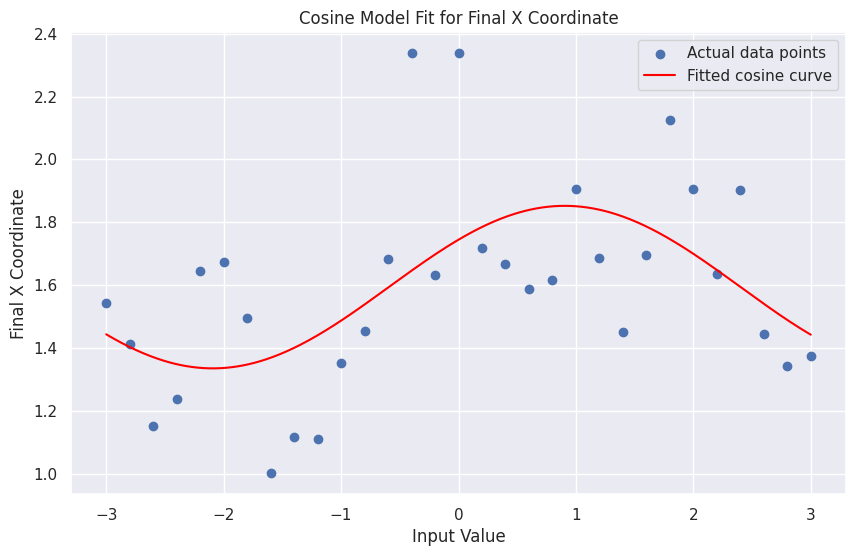

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.optimize import curve_fit

# Function to load all CSV files
def load_all_data(folder_path):
    file_pattern = f"{folder_path}/*_xy_theta.csv"
    all_files = glob.glob(file_pattern)
    data_dict = {}
    for file in all_files:
        input_value = float(file.split('/')[-1].split('_')[0])
        data_dict[input_value] = pd.read_csv(file)
    return data_dict

# Load data from the specified folder
data_dict = load_all_data('100_50_600')

# Extract final x values
final_x_values = {input_value: df['x'].iloc[-1] for input_value, df in data_dict.items()}

# Convert to DataFrame for easier manipulation
final_values_df = pd.DataFrame(list(final_x_values.items()), columns=['input', 'final_x'])

# Define a cosine model function
def cosine_model(x, a, b, c, d):
    return a * np.cos(b * x + c) + d

# Fit cosine model to the data
popt, pcov = curve_fit(cosine_model, final_values_df['input'].values, final_values_df['final_x'].values, p0=[1, 1, 0, 0])

# Predicted values from the model
final_values_df['predicted_x'] = cosine_model(final_values_df['input'].values, *popt)

# Calculate R-squared
residuals = final_values_df['final_x'].values - final_values_df['predicted_x'].values
ss_res = np.sum(residuals**2)
ss_tot = np.sum((final_values_df['final_x'].values - np.mean(final_values_df['final_x'].values))**2)
r_squared = 1 - (ss_res / ss_tot)

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))

# Calculate MAE
mae = np.mean(np.abs(residuals))

print(f"R-squared: {r_squared}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Plot actual data points and fitted cosine curve
plt.figure(figsize=(10, 6))
plt.scatter(final_values_df['input'], final_values_df['final_x'], label='Actual data points')
x_fit = np.linspace(min(final_values_df['input']), max(final_values_df['input']), 500)
y_fit = cosine_model(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', label='Fitted cosine curve')

plt.xlabel('Input Value')
plt.ylabel('Final X Coordinate')
plt.title('Cosine Model Fit for Final X Coordinate')
plt.legend()
plt.grid(True)
plt.show()
